# HR Employee Attrition Case Study

In [1]:
# Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

## Description of dataset

### HR Analytics Project- Understanding the Attrition in HR

#### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

## Loading Database

In [2]:
# https://raw.githubusercontent.com/Bhushan0130/Datasets/main/WA_Fn-UseC_-HR-Employee-Attrition.csv

df = pd.read_csv('https://raw.githubusercontent.com/Bhushan0130/Datasets/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.shape

# Dataset have 1470 rows and 35 columns

(1470, 35)

In [3]:
pd.set_option('display.max_rows', None)  # to maximize the rows
pd.set_option('display.max_columns', None)  # to maximize the columns

In [4]:
df.head()  # top 5 rows

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [5]:
df.sample()

Age Attrition BusinessTravel  DailyRate Department  DistanceFromHome  \
771   54        No  Travel_Rarely       1082      Sales                 2   

     Education EducationField  EmployeeCount  EmployeeNumber  \
771          4  Life Sciences              1            1070   

     EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
771                        3  Female          41               2         3   

             JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
771  Sales Executive                3       Married          10686   

     MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
771         8392                   6      Y       No                 11   

     PerformanceRating  RelationshipSatisfaction  StandardHours  \
771                  3                         2             80   

     StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
771                 1                 13                      4   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
771                3               9                   4   

     YearsSinceLastPromotion  YearsWithCurrManager  
771                        7                     0

In [6]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  \
1465            2061                        3   Male          41   
1466            2062                        4   Male          42   
1467            2064                        2   Male          87   
1468            2065                        4   Male          63   
1469            2068                        2   Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
1465       Married           2571        12290                   4      Y   
1466       Married           9991        21457                   4      Y   
1467       Married           6142         5174                   1      Y   
1468       Married           5390        13243                   2      Y   
1469       Married           4404        10228                   2      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
1465       No                 17                  3                         3   
1466       No                 15                  3                         1   
1467      Yes                 20                  4                         2   
1468       No                 14                  3                         4   
1469       No                 12                  3                         1   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
1465             80                 1                 17   
1466             80                 1                  9   
1467             80                 1                  6   
1468             80                 0                 17   
1469             80                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1465                   2                        0                     3  
1466                   7                        1                     7  
1467                   2                        0                     3  
1468                   6                        0                     8  
1469                   3                        1                     2

## Information about dataset

In [7]:
df.info()

#  #   Column                    Non-Null Count  Dtype 
# ---  ------                    --------------  ----- 
#  0   Age                       1470 non-null   int64 
#  1   Attrition                 1470 non-null   object
#  2   BusinessTravel            1470 non-null   object
#  3   DailyRate                 1470 non-null   int64 
#  4   Department                1470 non-null   object
#  5   DistanceFromHome          1470 non-null   int64 
#  6   Education                 1470 non-null   int64 
#  7   EducationField            1470 non-null   object
#  8   EmployeeCount             1470 non-null   int64 
#  9   EmployeeNumber            1470 non-null   int64 
#  10  EnvironmentSatisfaction   1470 non-null   int64 
#  11  Gender                    1470 non-null   object
#  12  HourlyRate                1470 non-null   int64 
#  13  JobInvolvement            1470 non-null   int64 
#  14  JobLevel                  1470 non-null   int64 
#  15  JobRole                   1470 non-null   object
#  16  JobSatisfaction           1470 non-null   int64 
#  17  MaritalStatus             1470 non-null   object
#  18  MonthlyIncome             1470 non-null   int64 
#  19  MonthlyRate               1470 non-null   int64 
#  20  NumCompaniesWorked        1470 non-null   int64 
#  21  Over18                    1470 non-null   object
#  22  OverTime                  1470 non-null   object
#  23  PercentSalaryHike         1470 non-null   int64 
#  24  PerformanceRating         1470 non-null   int64 
#  25  RelationshipSatisfaction  1470 non-null   int64 
#  26  StandardHours             1470 non-null   int64 
#  27  StockOptionLevel          1470 non-null   int64 
#  28  TotalWorkingYears         1470 non-null   int64 
#  29  TrainingTimesLastYear     1470 non-null   int64 
#  30  WorkLifeBalance           1470 non-null   int64 
#  31  YearsAtCompany            1470 non-null   int64 
#  32  YearsInCurrentRole        1470 non-null   int64 
#  33  YearsSinceLastPromotion   1470 non-null   int64 
#  34  YearsWithCurrManager      1470 non-null   int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
# Every column is containing 1470 non null values means, no null value present in the dataset
# 9 columns are of object type and rest are of int64 type

## Null value checking 

In [9]:
df.isnull().sum().sum()

# 0 (No null value present in the dataset)

0

<AxesSubplot:>

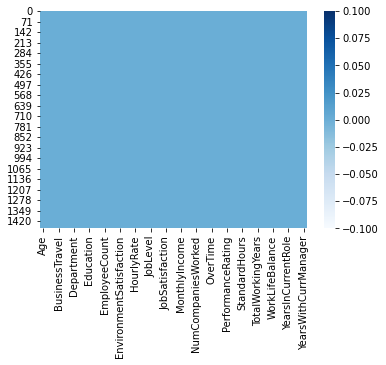

In [10]:
sns.heatmap(df.isnull(), cmap = 'Blues')

In [11]:
# Heatmap is clear, means not null point present 

## Data Preprocessing

#### Deleting columns which are not necessary for Training the model

In [12]:
# EmployeeNumber column is just a unique number of each employee, which does not contribut anything to predict attrition 
# Therefore we should delete this column

In [13]:
df.drop(columns = ['EmployeeNumber'], inplace = True)
df.shape

# (1470, 34)

(1470, 34)

In [14]:
df['StandardHours'].value_counts()
# 80    1470

# As it is same for each row, mean it is just a standard time therefore we should delete this column because it is not
# contributing to predict target or attrition

80    1470
Name: StandardHours, dtype: int64

In [15]:
df.drop(columns = ['StandardHours'], inplace = True)
df.shape

# (1470, 33)

(1470, 33)

In [16]:
df['EmployeeCount'].value_counts() 

# 1    1470

# As for 1470 rows this column is showing 1 which is just a count of number, and not contributing anything to predict target or
# attrition
# We should delete this column too

1    1470
Name: EmployeeCount, dtype: int64

In [17]:
df.drop(columns = ['EmployeeCount'], inplace = True)
df.shape
# (1470, 32)

(1470, 32)

In [18]:
# df.dtypes   # Over18                      

In [19]:
# One more column found which are not contributing to predict attrition
df['Over18'].value_counts() # Same value is in all row for over18 columns, indicating not contributing to predict target
# Y    1470

Y    1470
Name: Over18, dtype: int64

In [20]:
df.drop(columns = ['Over18'], inplace = True)

df.shape
# (1470, 31)

(1470, 31)

In [21]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [22]:
# Extracting all object type columns
cat_col = df.select_dtypes(include = 'object').keys()
print(cat_col)
print(len(cat_col))

# Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
#        'JobRole', 'MaritalStatus', 'OverTime'],
#       dtype='object')
# 8

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')
8


In [23]:
# Extracing all int type columns
int_col = df.select_dtypes(include = 'int64').keys()
print(int_col)
print(len(int_col))

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
23


In [24]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [25]:
df.head(2)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   

   Gender  HourlyRate  JobInvolvement  JobLevel             JobRole  \
0  Female          94               3         2     Sales Executive   
1    Male          61               2         2  Research Scientist   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7

## Visualization

### For Categorical columns

<AxesSubplot:xlabel='Attrition', ylabel='count'>

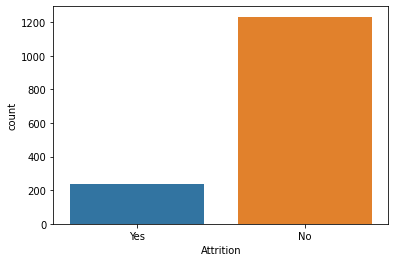

In [26]:
sns.countplot(df['Attrition'])

In [27]:
# Very less person are leaving company as compare to Not leaving company, which says that, company need to work litte more
# On personnel aspect of employee

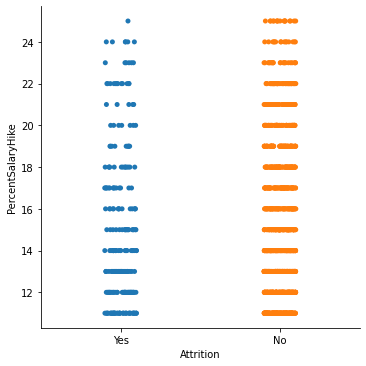

In [28]:
sns.catplot(x="Attrition", y="PercentSalaryHike", data=df)

In [29]:
# maximum employees who are getting good hike, they stay with company as data saying

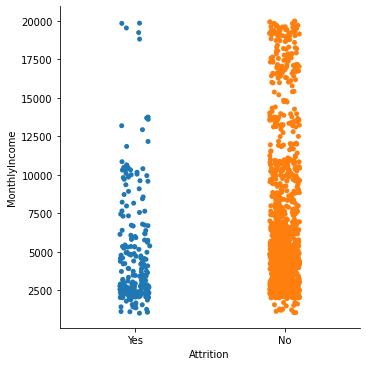

In [30]:
sns.catplot(x="Attrition", y="MonthlyIncome", data=df)

In [31]:
# We can target the problem of those employees whome monthly income is between 2000 - 7000
# As in this range(2000 - 7000) of Monthly salary, person is leaving organisation frequently 

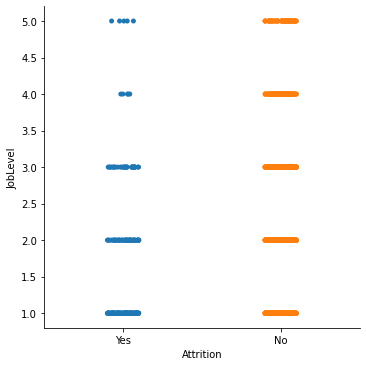

In [32]:
sns.catplot(x="Attrition", y="JobLevel", data=df)

In [33]:
# HR need to target, who problem employees are faced who are on Joblevel of 1, 2 and 3
# As attrition employee count is high in this Joblevel

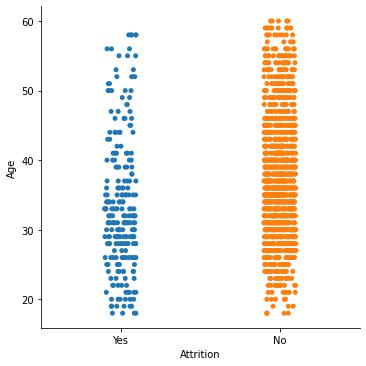

In [34]:
sns.catplot(x="Attrition", y="Age", data=df)

In [35]:
# In the age group of 20 to 40, employees have left the organisation 
# And those have crossed 40 age, then there is a stability of employees we can see

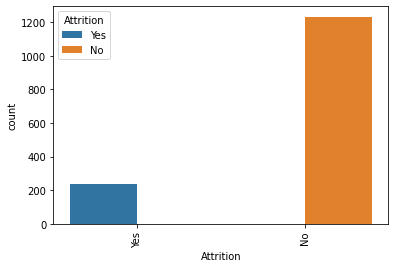

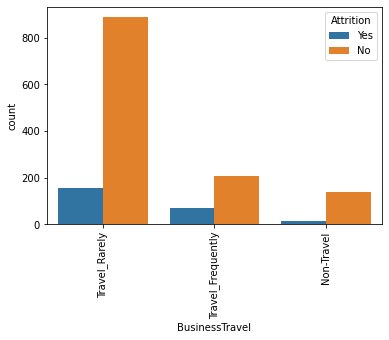

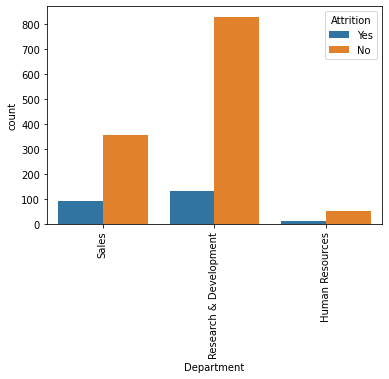

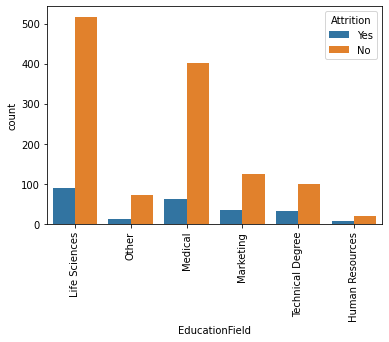

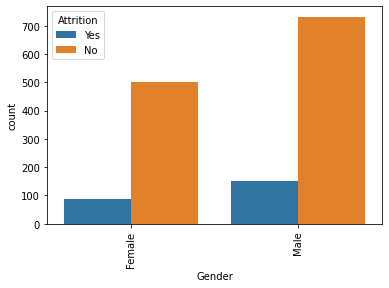

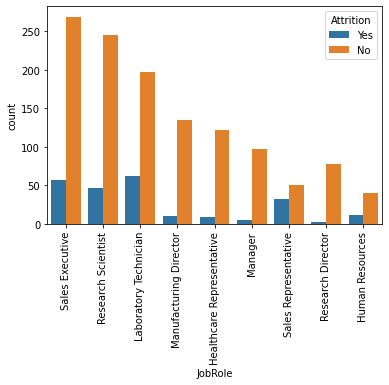

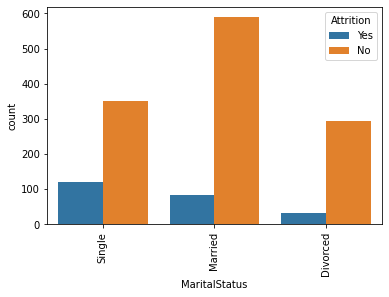

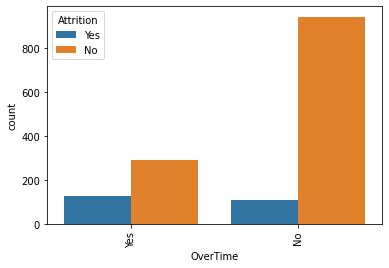

In [36]:
for i in cat_col:
    l = list(df[i].unique())
    bar = sns.countplot(df[i], hue = df['Attrition'])
    bar.set_xticklabels(labels = l, rotation = 90)
    plt.show()
    
    # As we can see, record of attrition is imbalanced
    # We need to perform some balancing techniques to balance this 

##### 1. Attrition
    Maximum employee are stay with company

#####  2. BusinessTravel
    Non-Travel employees are more loyal to company as there left is less

#####  3. Department
    HR Department employees are more satisfied therefore their leave rate is less
    
#####  4. EducationField
    Person who belongs from Life Science educational background, there is high chance that people will leave the compnay
    
#####  5. Gender
    Female are more stable with company, as its leaving rate is less

#####  6. JobRole
    We should focus what problem employees are facing who are on Laboratory Technician, as their leave rate is hightest as 
    compare to other

#####  7. Marital Status
    Person who is single, for that, there is high change that, employee can leave the jobrole
    
#####  8. OverTime
    As we can see their is not much difference between Overtime Yes and overtime No, 
    both male and female are interest to do overtime

<AxesSubplot:xlabel='Age', ylabel='count'>

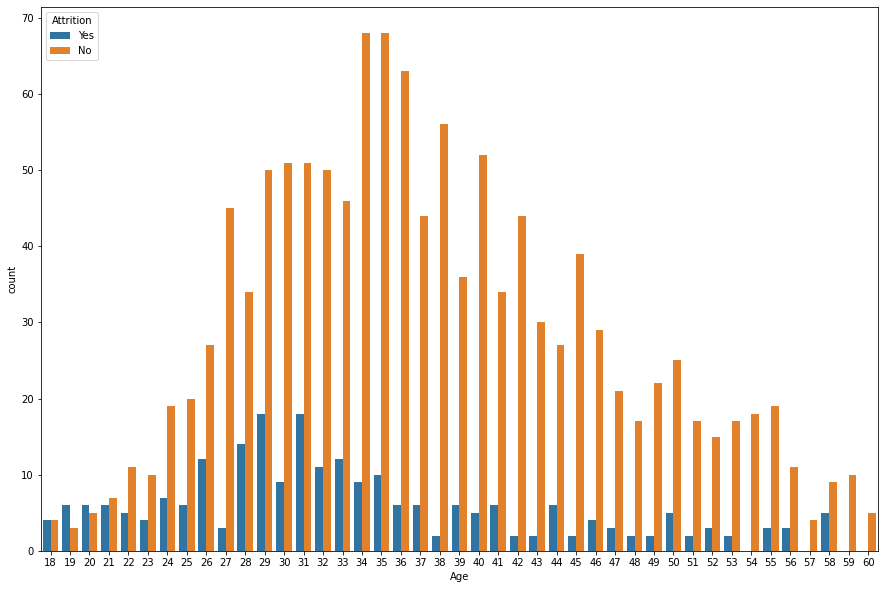

In [37]:
plt.figure(figsize = (15, 10))
sns.countplot(df['Age'], hue = df['Attrition'])

In [38]:
# maximum people left the organisation who are under the age of 18 to 21 years
# After the age of 35, usually emplyees avoid job changing decision

In [39]:
for i in cat_col:
    print('------------------',i, 'column -----------------------')
    print(df[i].value_counts())
    print('\n')
    
    
# ------------------ Attrition column -----------------------
# No     1233
# Yes     237
# Name: Attrition, dtype: int64


# ------------------ BusinessTravel column -----------------------
# Travel_Rarely        1043
# Travel_Frequently     277
# Non-Travel            150
# Name: BusinessTravel, dtype: int64


# ------------------ Department column -----------------------
# Research & Development    961
# Sales                     446
# Human Resources            63
# Name: Department, dtype: int64


# ------------------ EducationField column -----------------------
# Life Sciences       606
# Medical             464
# Marketing           159
# Technical Degree    132
# Other                82
# Human Resources      27
# Name: EducationField, dtype: int64


# ------------------ Gender column -----------------------
# Male      882
# Female    588
# Name: Gender, dtype: int64


# ------------------ JobRole column -----------------------
# Sales Executive              326
# Research Scientist           292
# Laboratory Technician        259
# Manufacturing Director       145
# Healthcare Representative    131
# Manager                      102
# Sales Representative          83
# Research Director             80
# Human Resources               52
# Name: JobRole, dtype: int64


# ------------------ MaritalStatus column -----------------------
# Married     673
# Single      470
# Divorced    327
# Name: MaritalStatus, dtype: int64


# ------------------ OverTime column -----------------------
# No     1054
# Yes     416

------------------ Attrition column -----------------------
No     1233
Yes     237
Name: Attrition, dtype: int64


------------------ BusinessTravel column -----------------------
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


------------------ Department column -----------------------
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


------------------ EducationField column -----------------------
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


------------------ Gender column -----------------------
Male      882
Female    588
Name: Gender, dtype: int64


------------------ JobRole column -----------------------
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Man

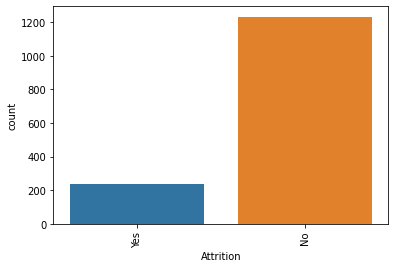

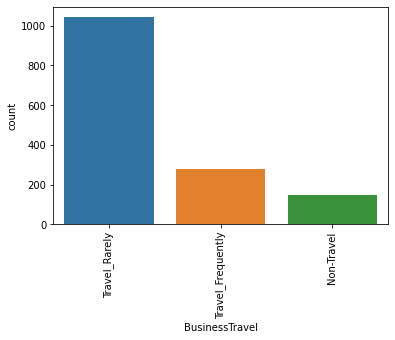

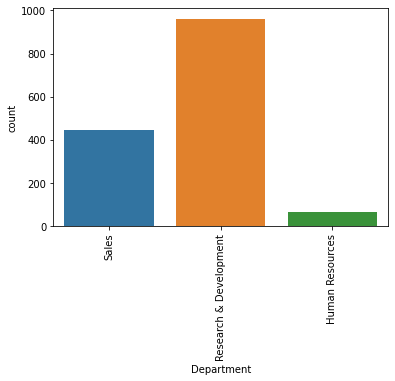

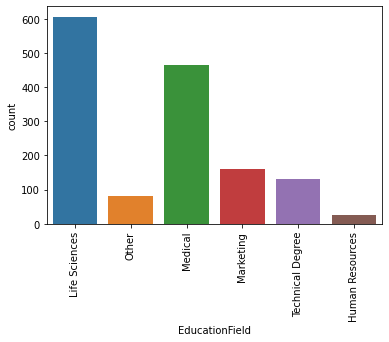

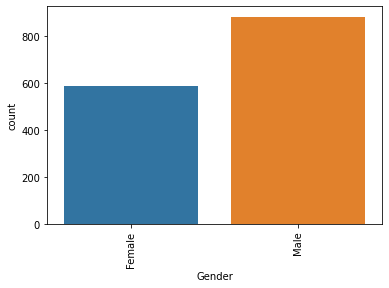

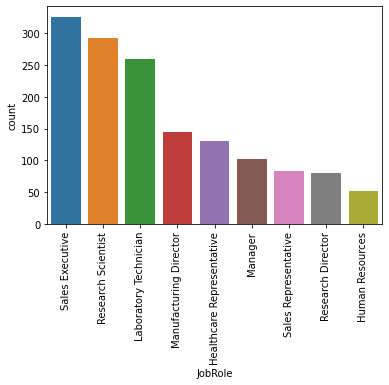

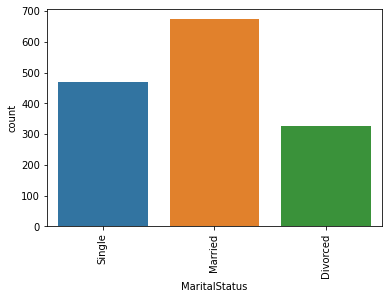

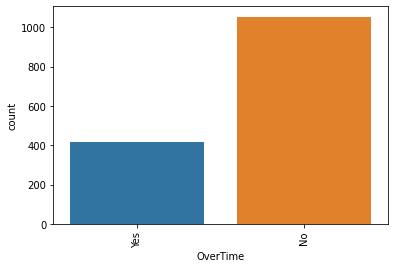

In [40]:
for i in cat_col:
    l = list(df[i].unique())
    bar = sns.countplot(df[i])
    bar.set_xticklabels(labels = l, rotation = 90)
    plt.show()

###### 1. Attrition
    As bar of no is higher than yes means, Maximum employees are working in company (No)

###### 2. BusinessTravel
    Travel_Rarely is highest, count of employees who travel rarely is highest,
    Indicate maximum employees can travel sometimes for businessTravel

###### 3. Department
    By this we can see, very less people are in HR department and maximum compay manpower in the Research & Development Department

###### 4. EducationField
    Maximum employee of company are belonging from Life Sciences educational background

###### 5. Gender
    male candidate are higher in the company manpower strength

###### 6. JobRole
    Highest number of employees are in Sale department, we can say sale Executive are back bone of the company

###### 7. MaritalStatus
    Maxium employee are married

###### 8. Overtime
    few people do overtime for the corporation 
    

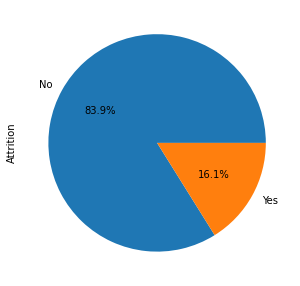

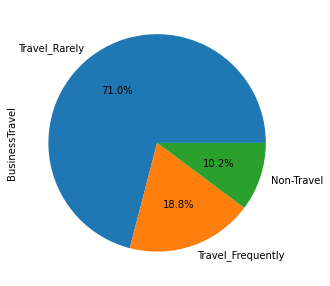

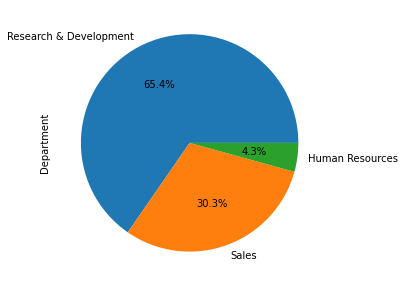

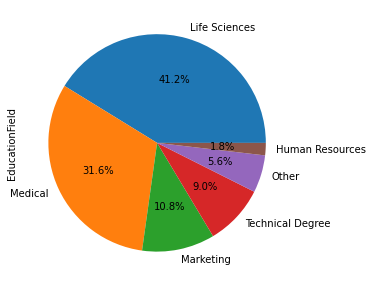

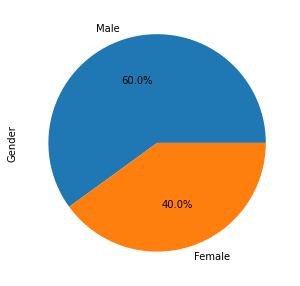

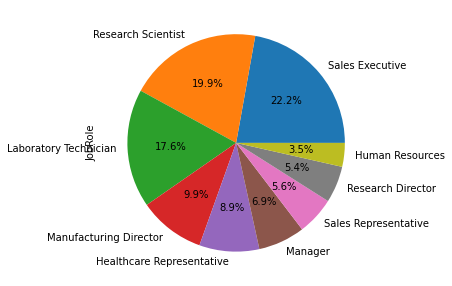

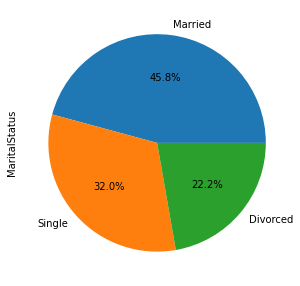

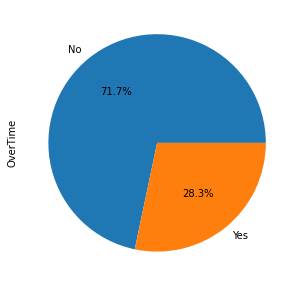

In [41]:
# We can see percentage of each columns classes
for i in cat_col:
    plt.figure(figsize = (8, 5))
    df[i].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

##### 1. Attrition
    No: 83.9% (currently working in company)
    Yes: 16.1 (left the company)

##### 2. BusinessTravel
    Very less employees in the company, who resist to Travel 
    Maximum employee are okay to travel for sometimes
    
##### 3. Department
    As we can see, maximum employees are in Research and development, we can say This department is back bone of the company
    
    
##### 4. EducationalField
    highest Education field is life science and less education field is HR

##### 5.  Gender  
    6(M):4 (F) female ration of manpower 
    
##### 6. JobRole
    Maximum (22%) employees are on Sale And Executive job role
    
##### 7. Marrital Status
    45.8% Employees are married
    Least employees are divorced 
    
##### 8. OverAtime
    No: 71.7%
    yes: 28.3 % 

In [42]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [43]:
# fig, ax = plt.subplots()
# ax.plot(df['JobSatisfaction'], df['EnvironmentSatisfaction'])
# # ax.plot(activity, cat, label="cat")
# # ax.legend()

### for int type columns

In [44]:
int_col

# ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
#        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
#        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
#        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
#        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
#        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
#        'YearsSinceLastPromotion', 'YearsWithCurrManager']

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### Checking Ouliers

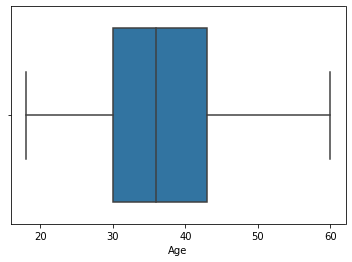

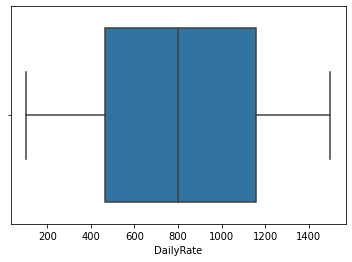

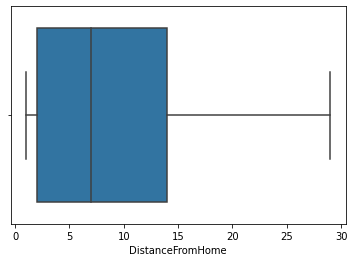

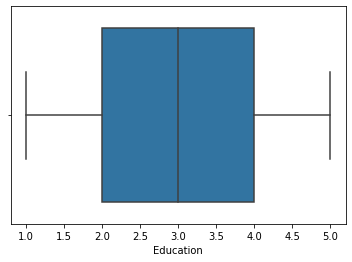

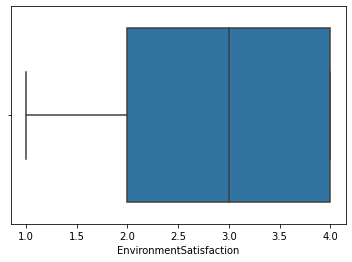

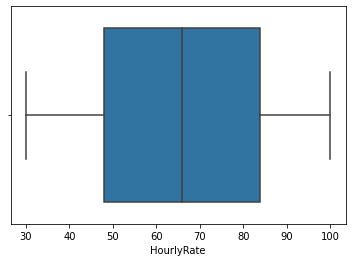

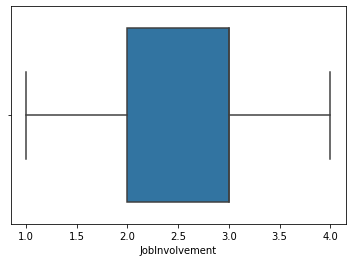

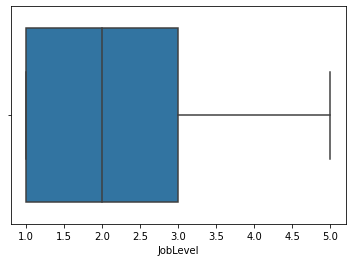

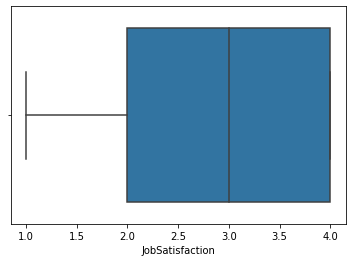

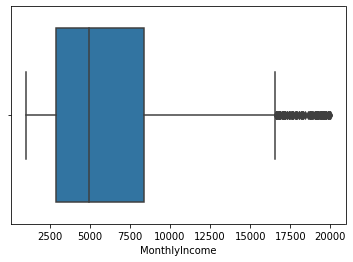

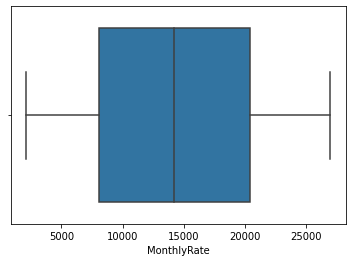

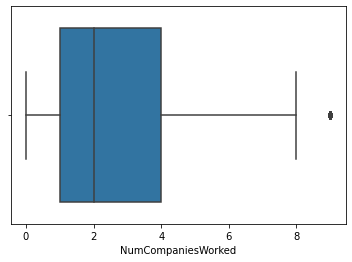

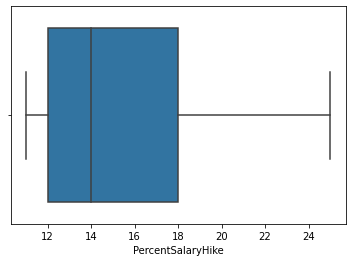

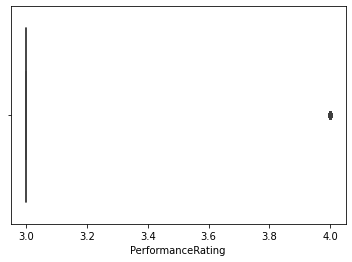

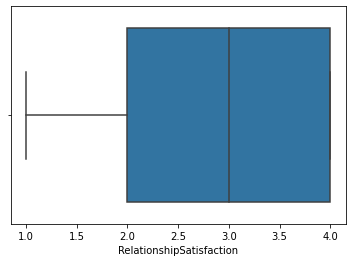

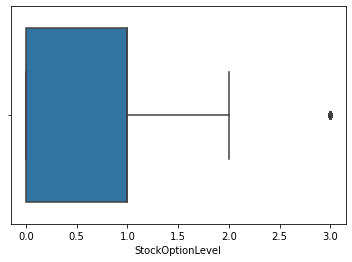

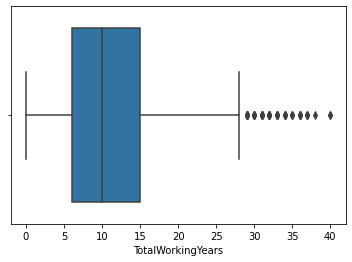

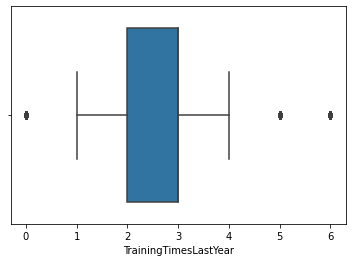

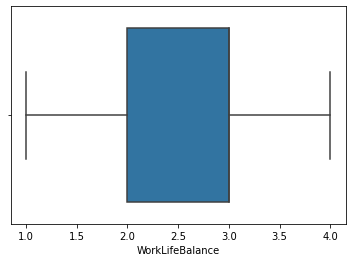

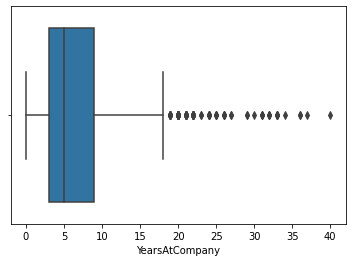

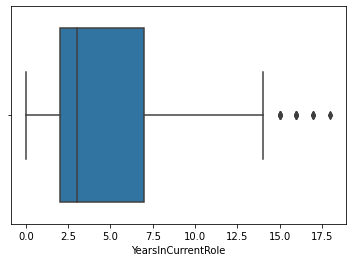

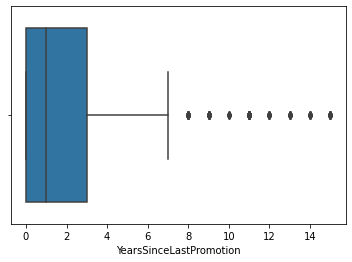

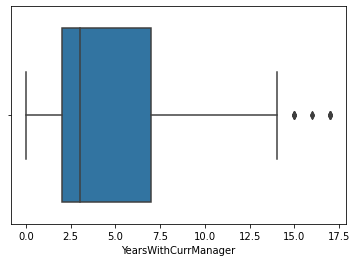

In [45]:
for i in int_col:
    plt.figure()
    sns.boxplot(df[i])

In [46]:
# MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear
# YearsAtCompany, YearInCurrentRole, YearSinceLastPromotion, YearsWithCurrManager
# These mentioned columns are containing outliers, 
# other than these mentioned columns, are not containing any outliers

### Check Skewness

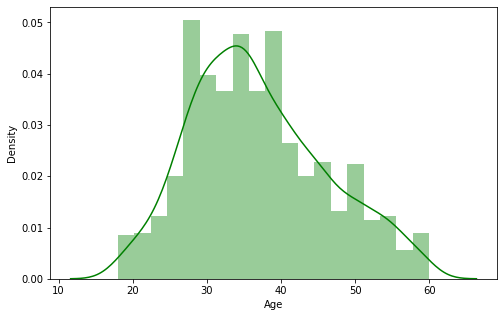

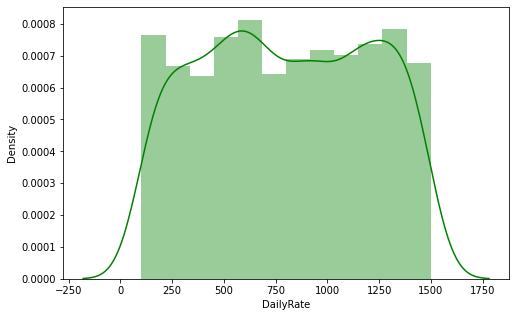

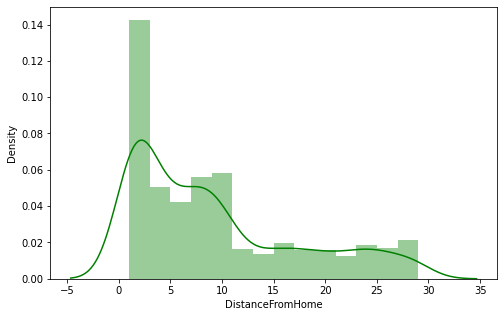

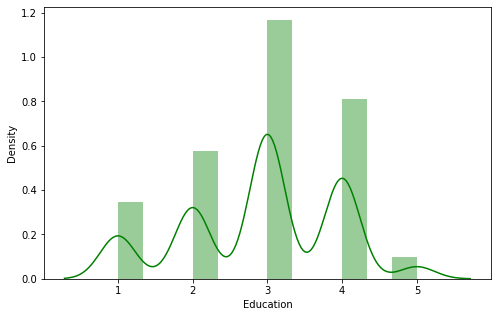

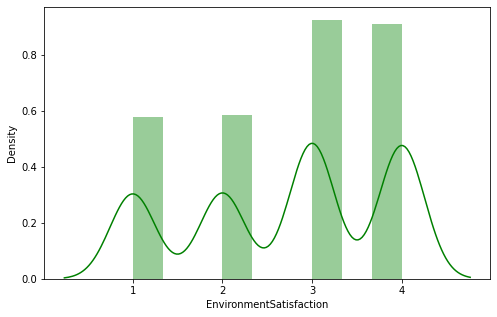

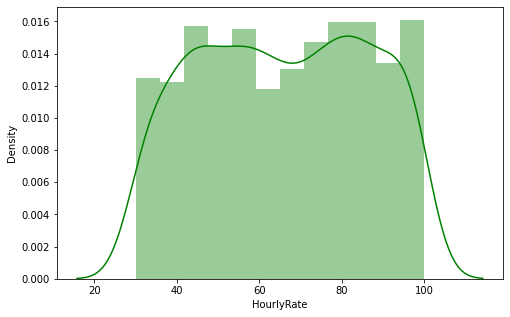

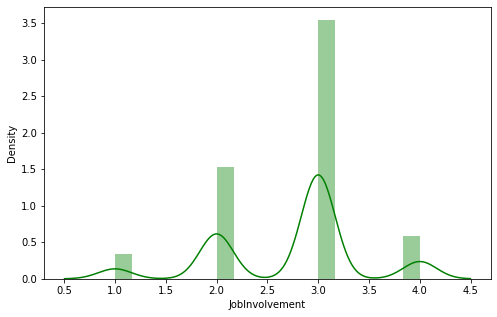

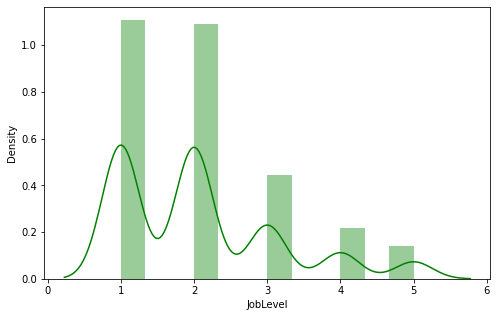

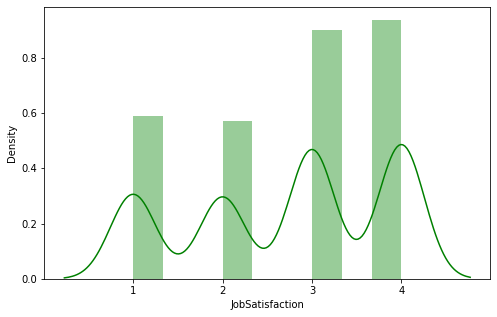

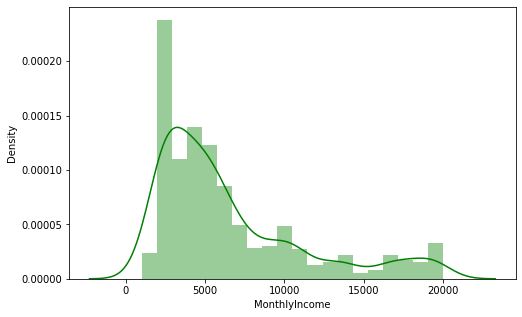

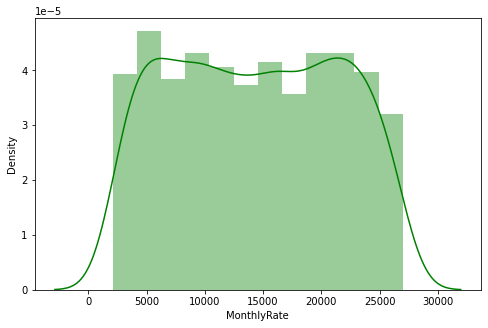

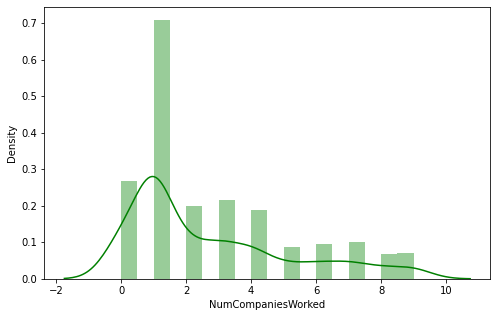

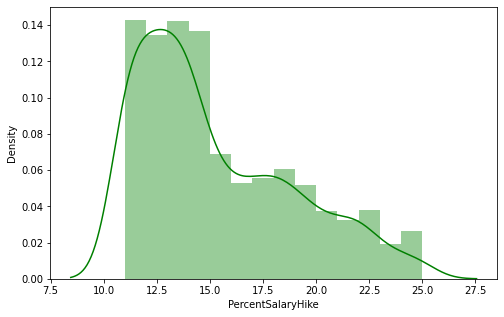

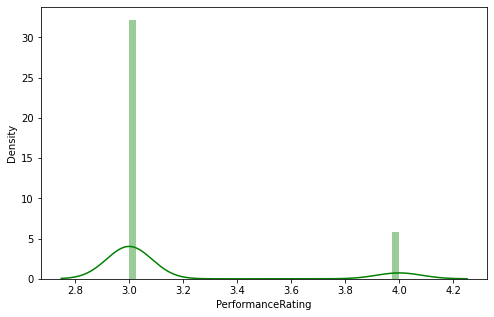

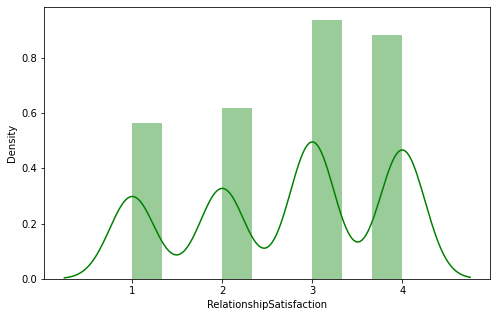

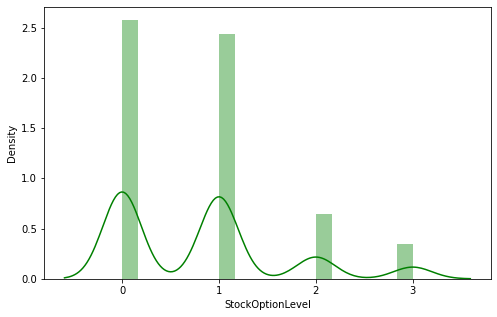

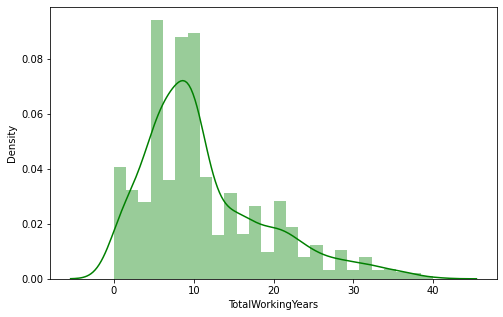

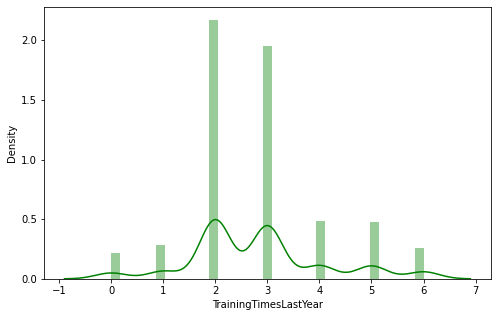

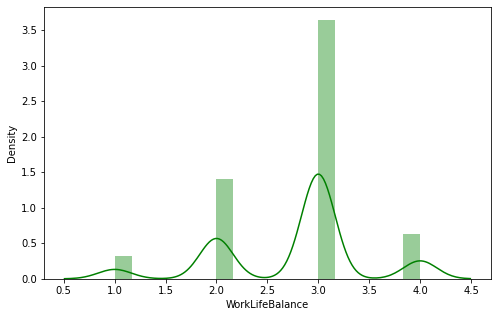

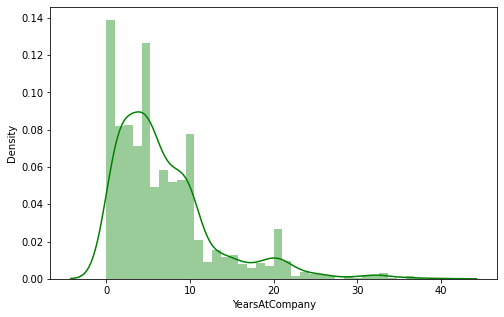

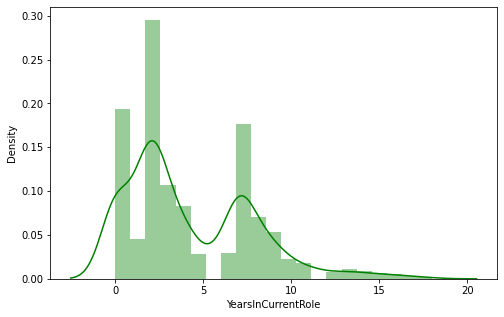

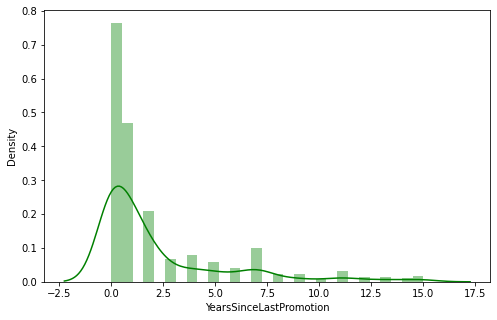

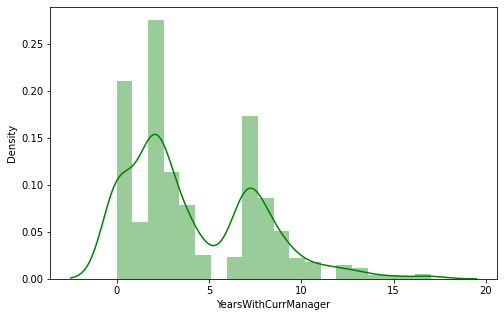

In [47]:
for i in int_col:
    plt.figure(figsize = (8,5))
    sns.distplot(df[i], color = 'g')

In [48]:
# DistanceFromHome, MonthlyIncome column is highly right skewed
# The PerformanceRating distplot, 4.0 is a outlier, need to fix it
# As oberved from the above displot maximum columns are showiing skewness
# Need to work on it, to train our ML Model

### Distribution of Columns

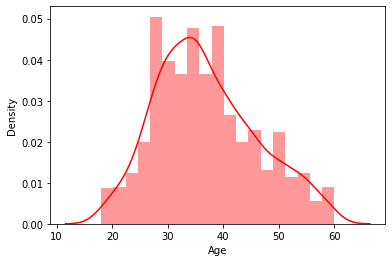

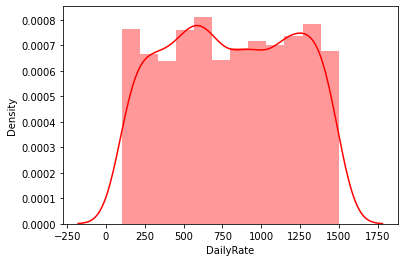

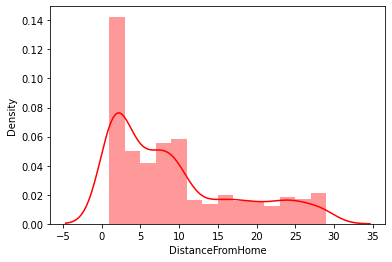

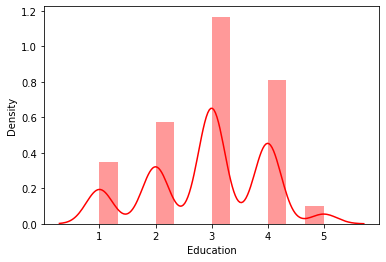

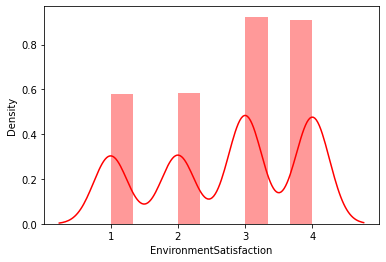

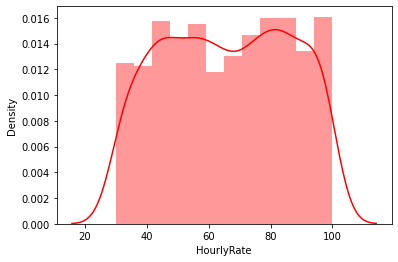

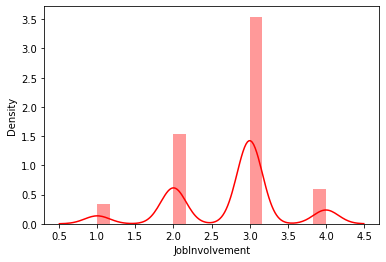

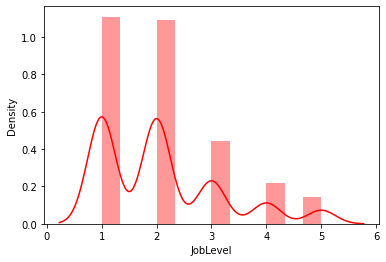

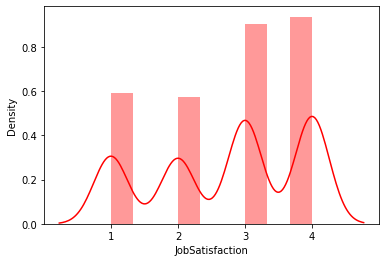

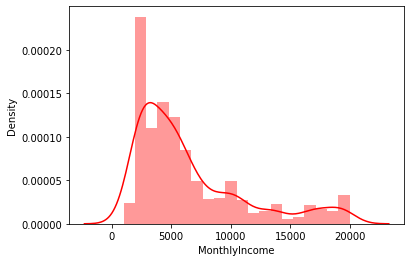

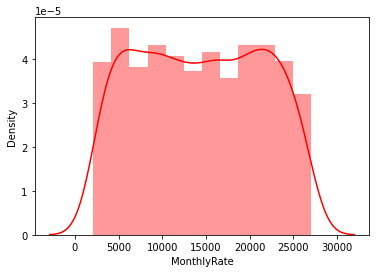

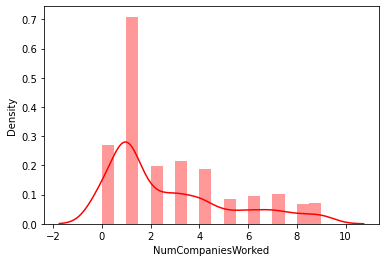

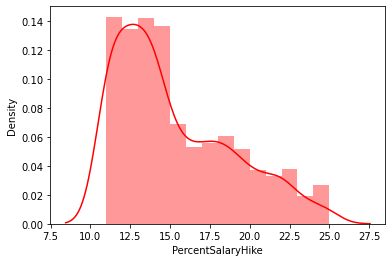

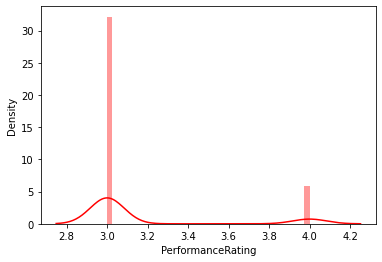

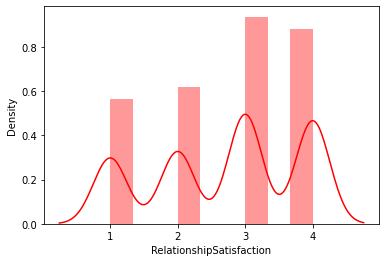

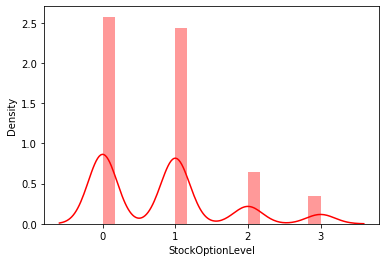

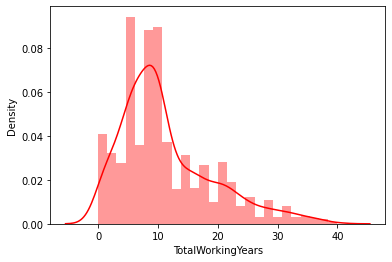

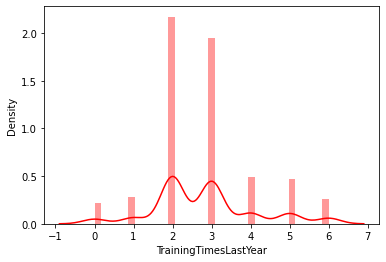

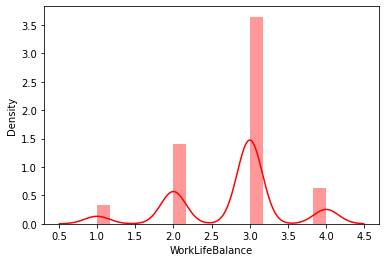

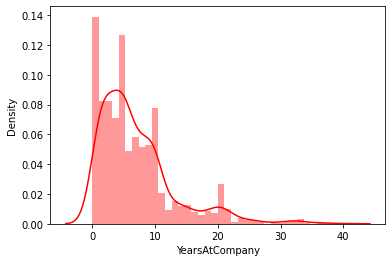

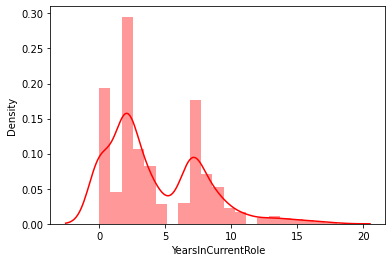

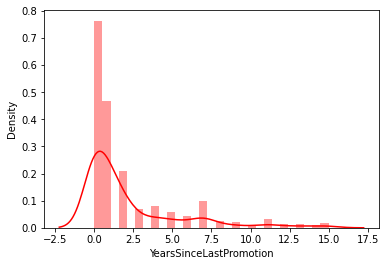

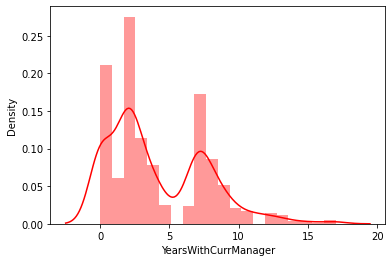

In [49]:
for i in int_col:
    plt.figure()
    sns.distplot(df[i], kde = True, color = 'r')

In [50]:
# As we need to work on skewness of data, after removing skewness data will be towards normal distributed
# now, Age column is alomost normally distributed , other than this column all columns are showing non normally distributed 
# Distplot
# When skewness of data would be remove, then only distribution will be towards normally distributed data

### Spread of Columns

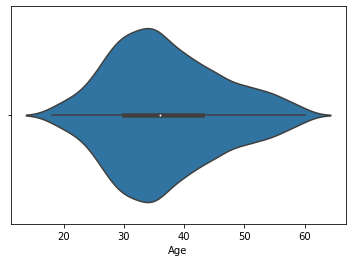

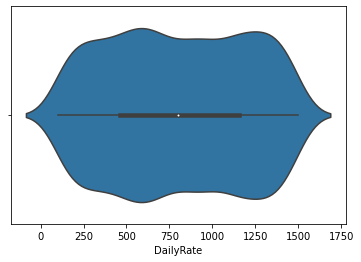

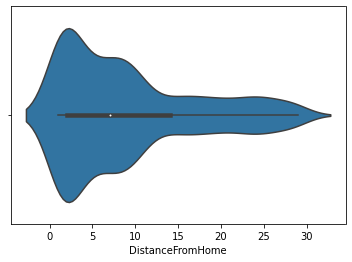

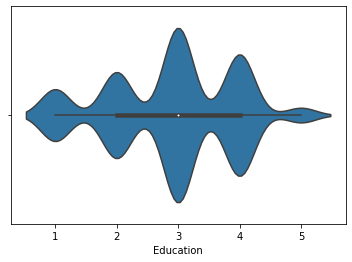

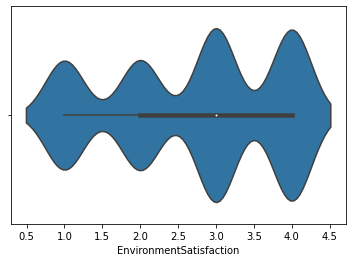

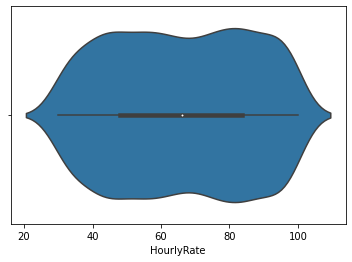

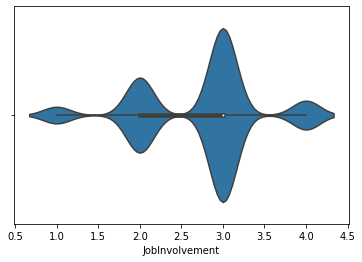

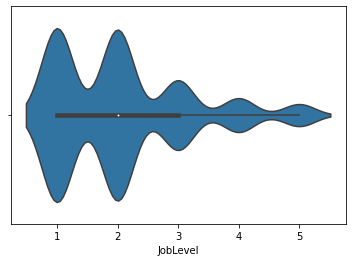

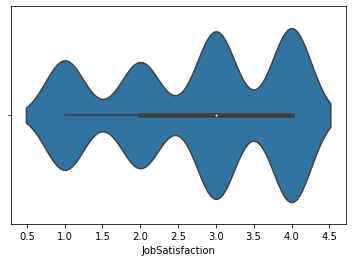

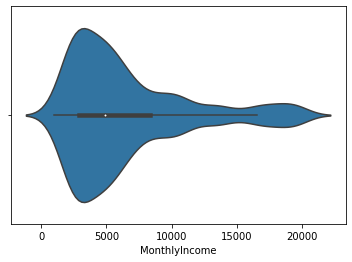

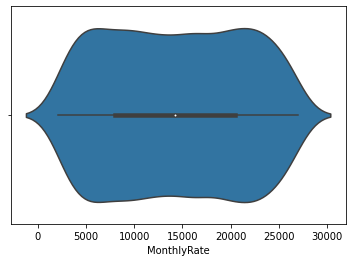

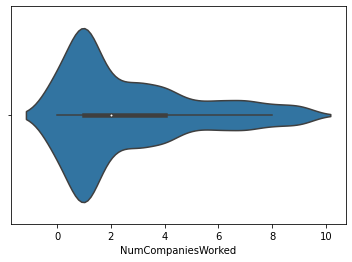

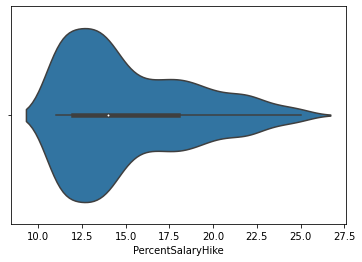

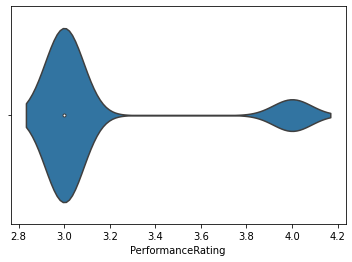

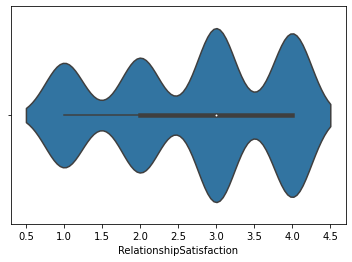

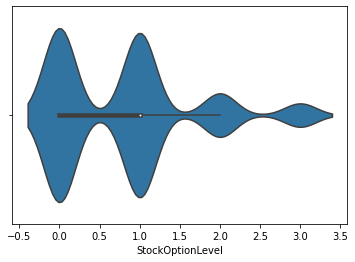

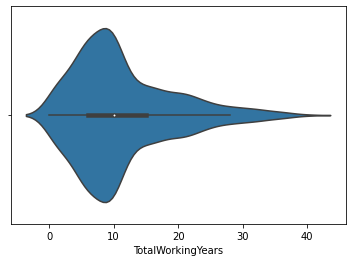

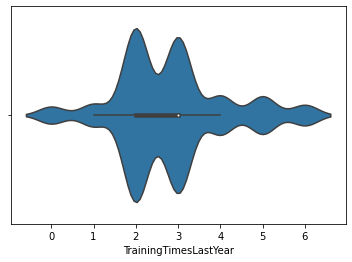

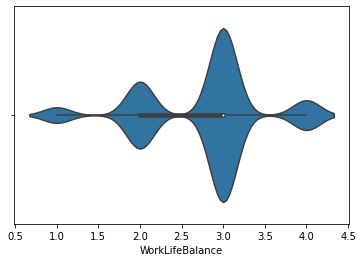

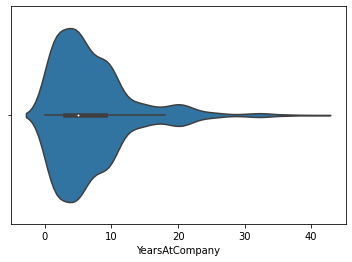

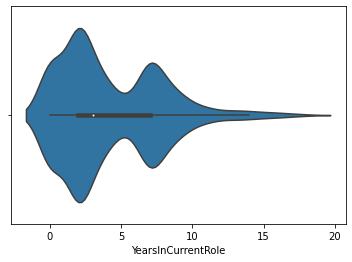

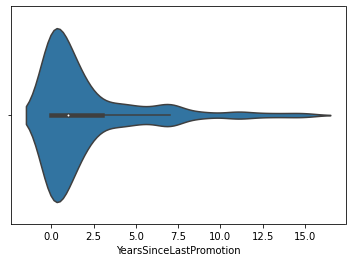

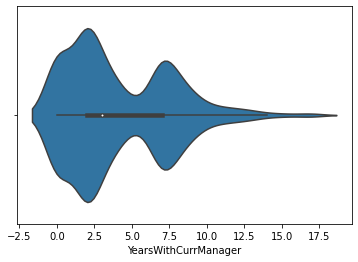

In [51]:
for i in int_col:    
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')

In [52]:
# Age, Dailyrate, HourlyRate, Monthly rate  are well spreaded
# other than these columns, data is not well distributed, it is showing classes wise data distribution

### Knowing the pattern of data

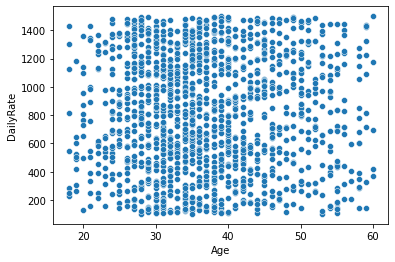

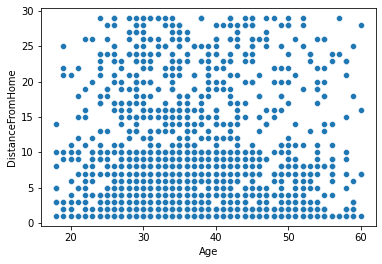

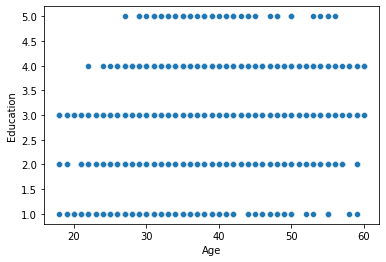

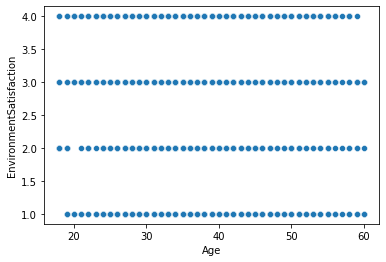

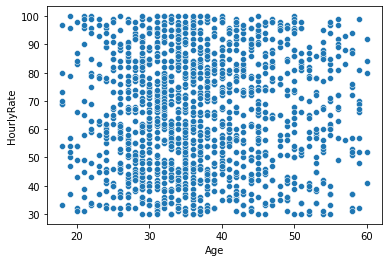

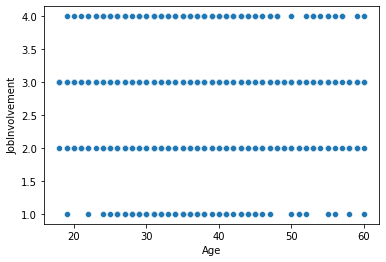

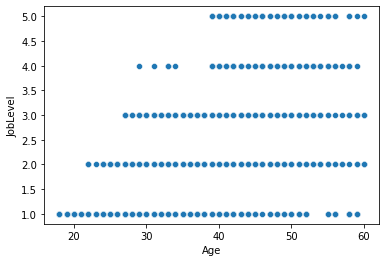

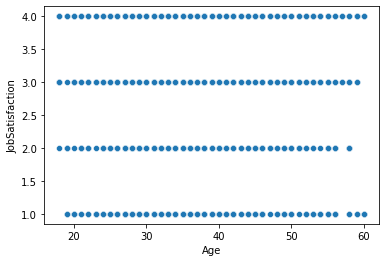

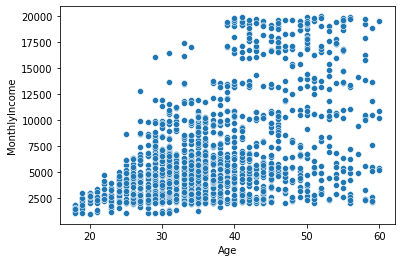

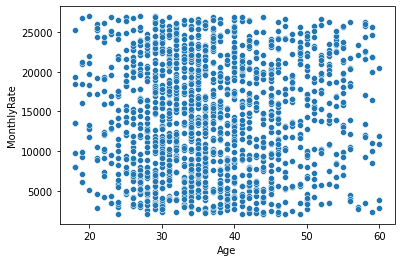

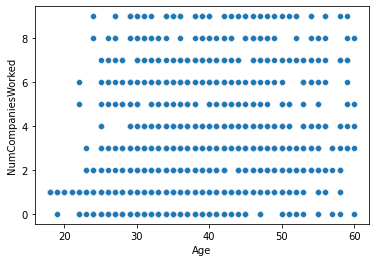

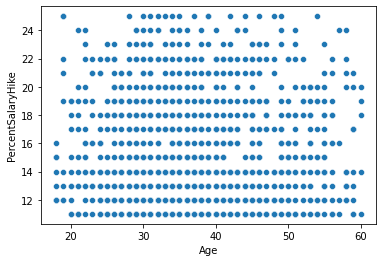

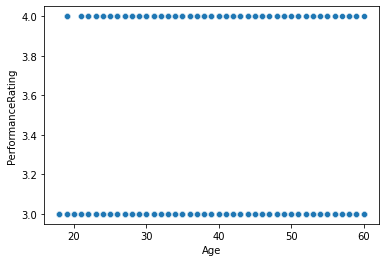

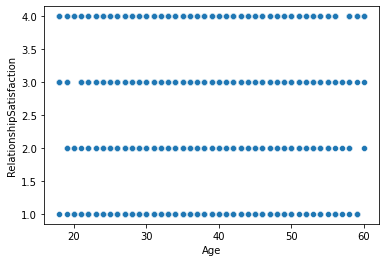

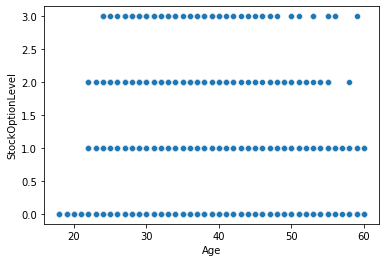

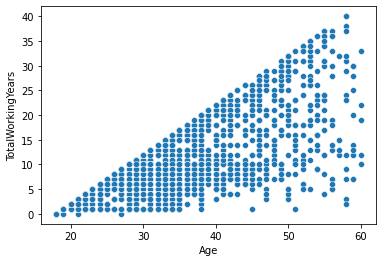

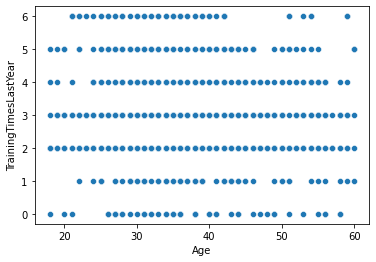

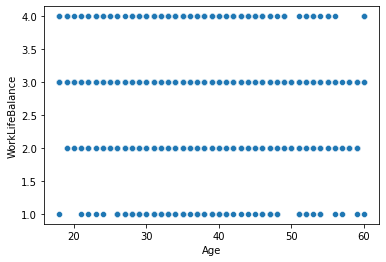

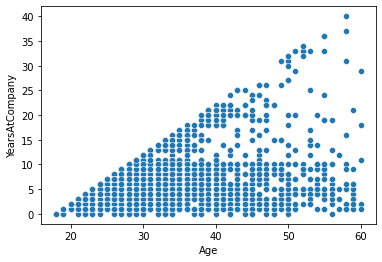

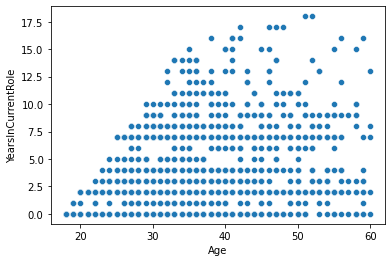

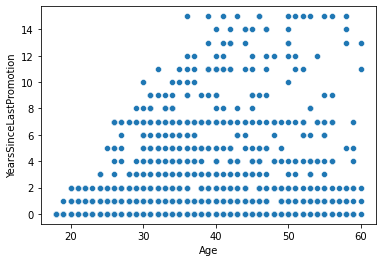

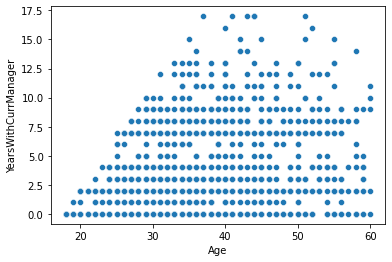

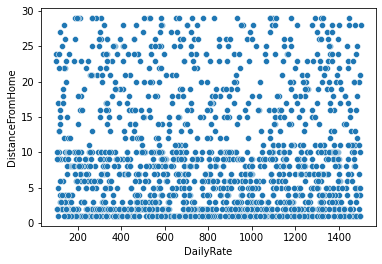

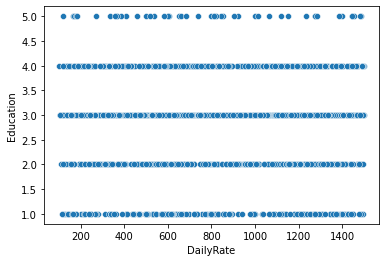

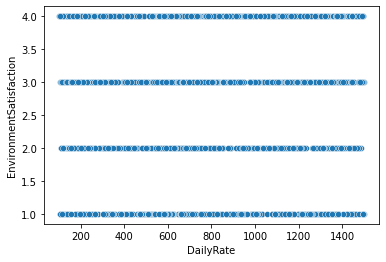

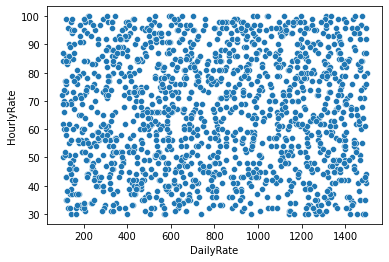

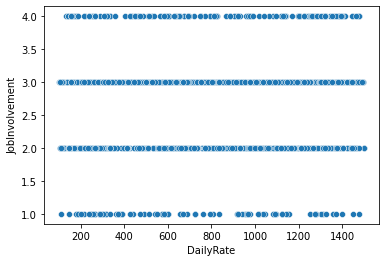

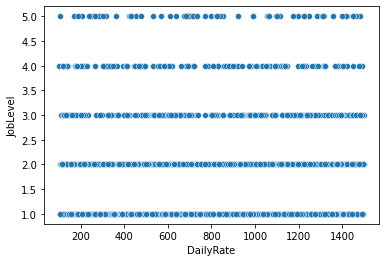

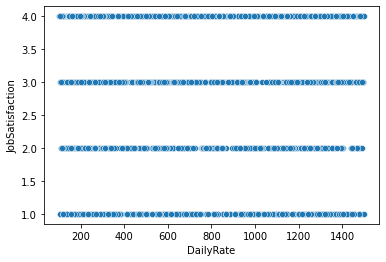

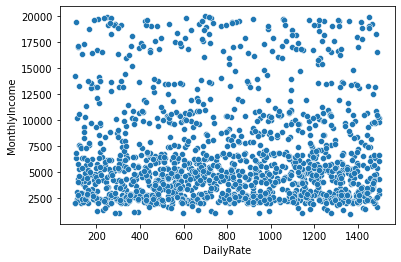

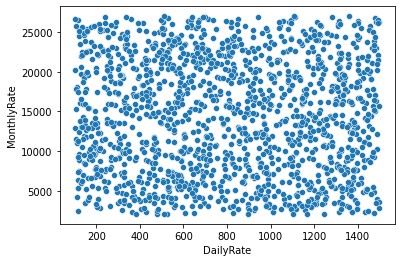

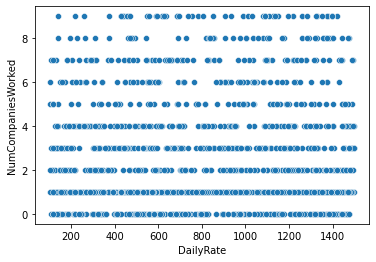

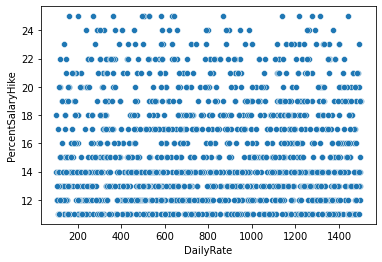

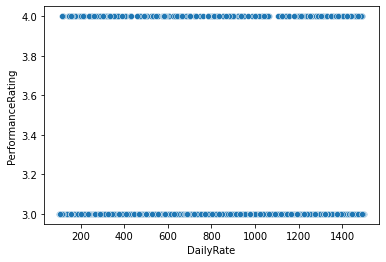

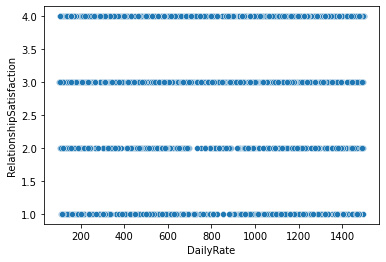

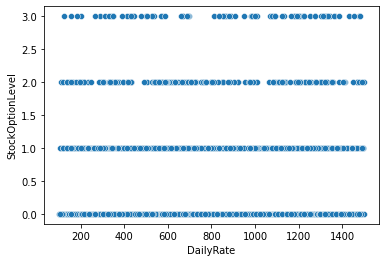

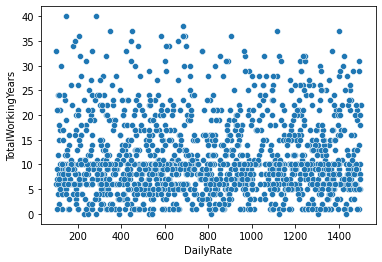

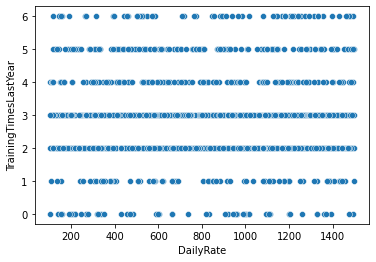

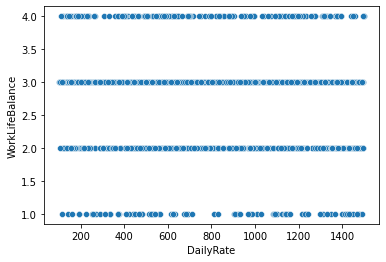

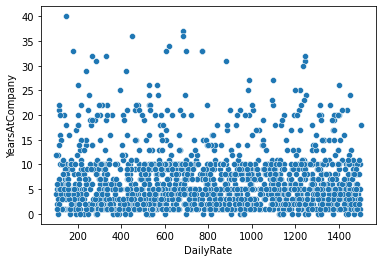

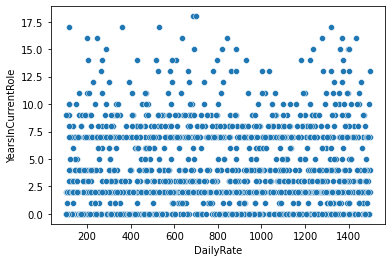

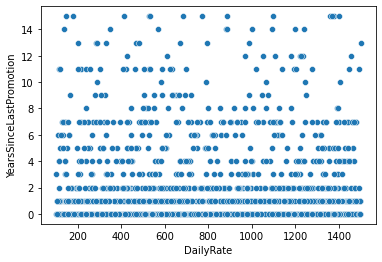

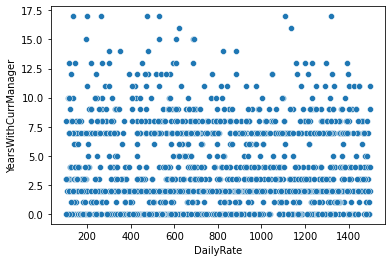

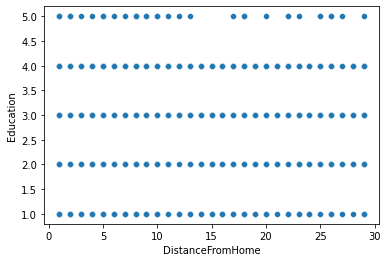

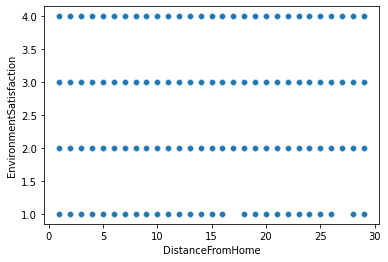

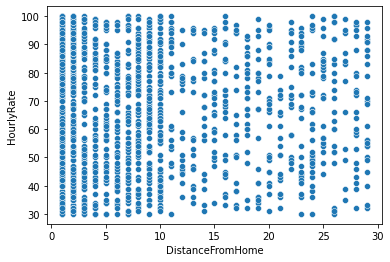

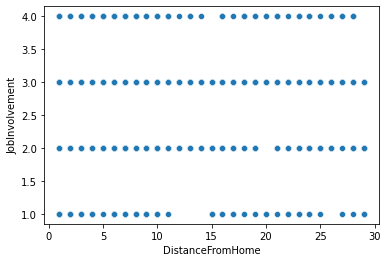

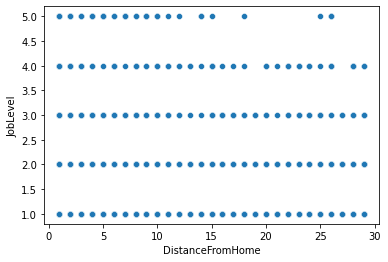

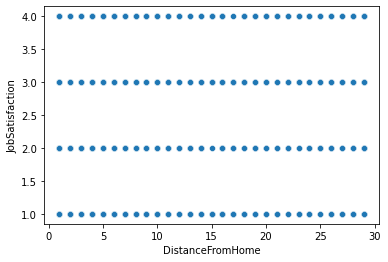

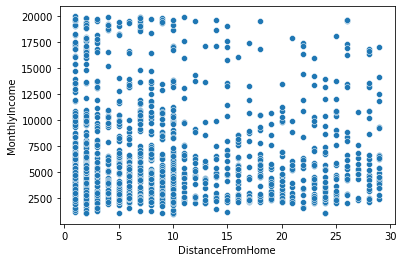

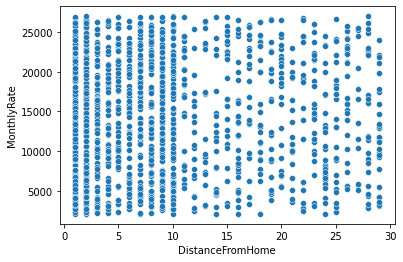

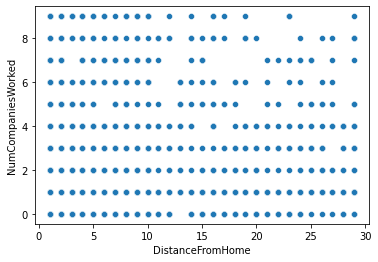

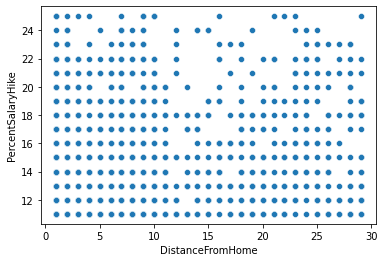

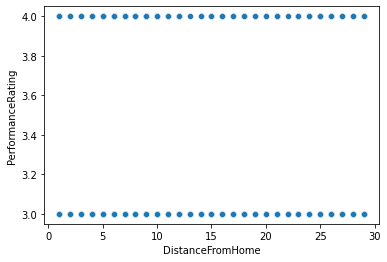

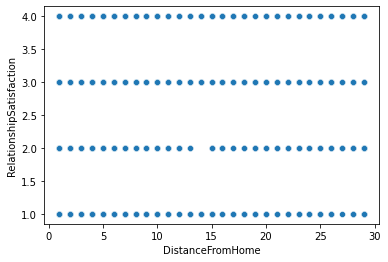

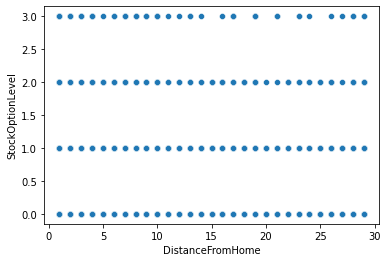

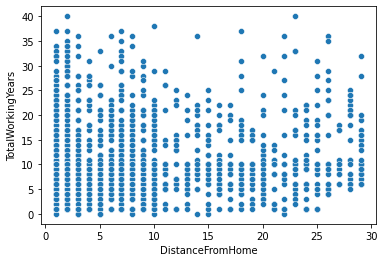

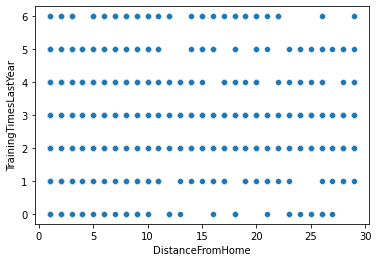

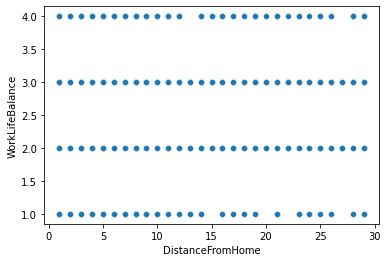

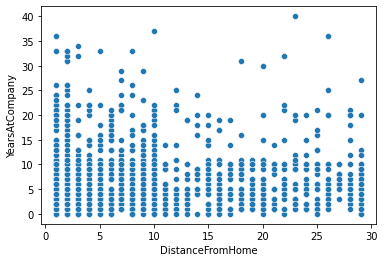

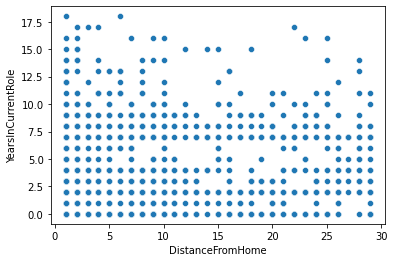

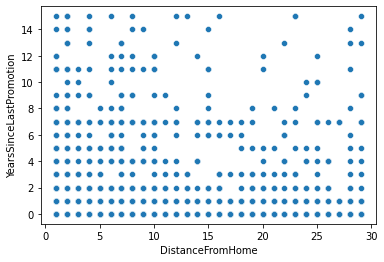

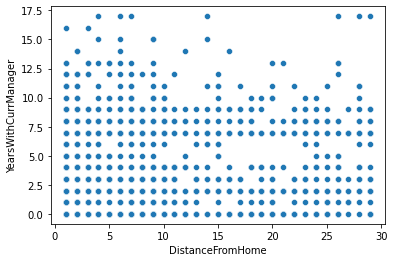

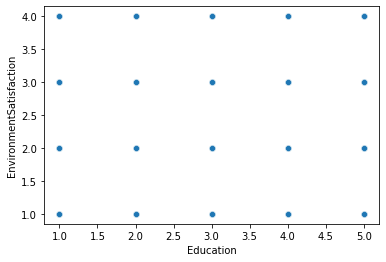

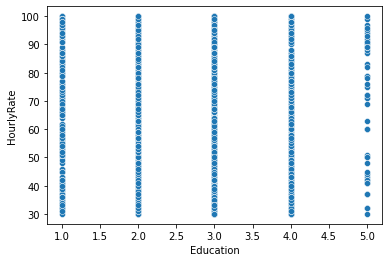

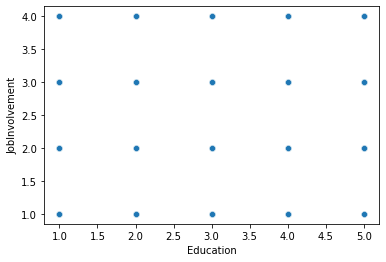

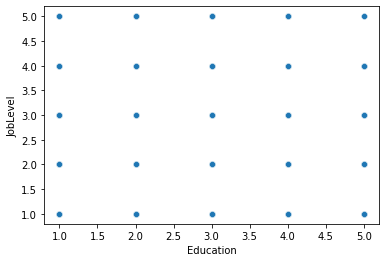

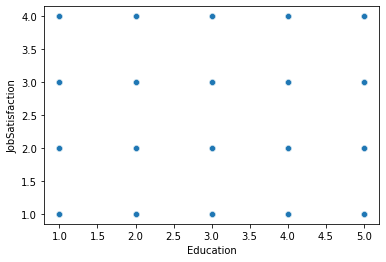

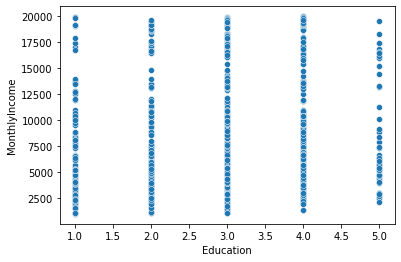

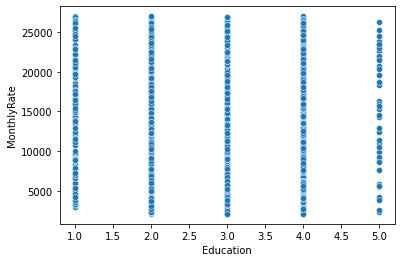

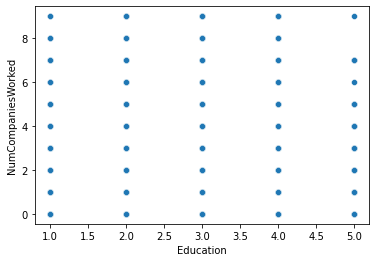

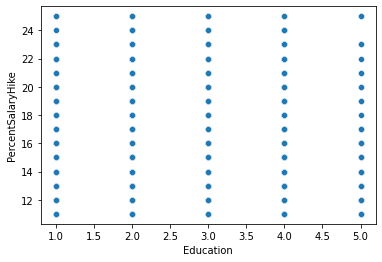

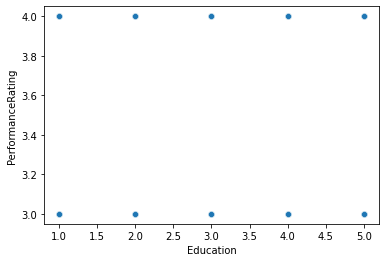

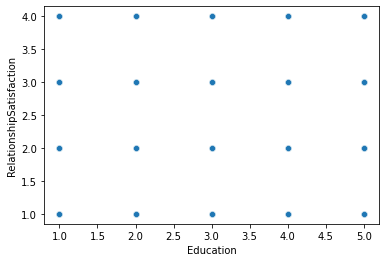

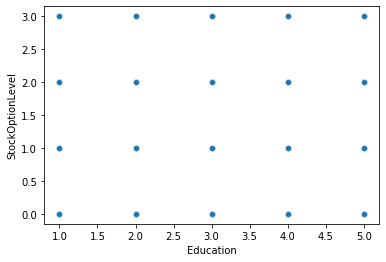

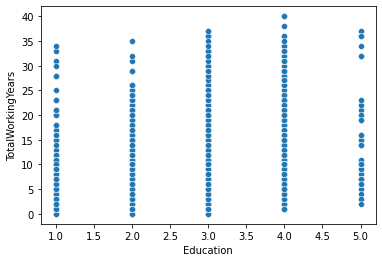

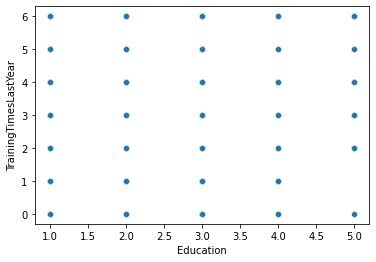

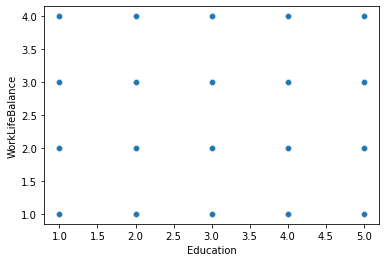

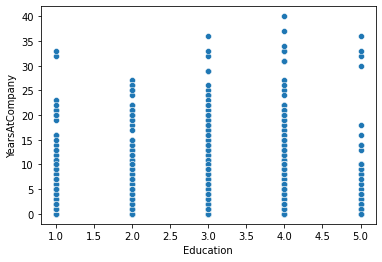

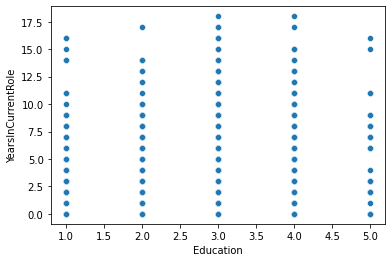

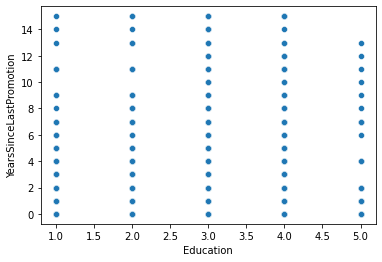

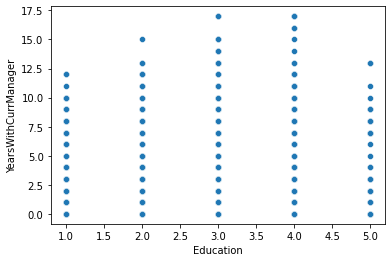

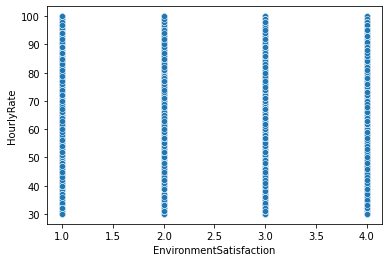

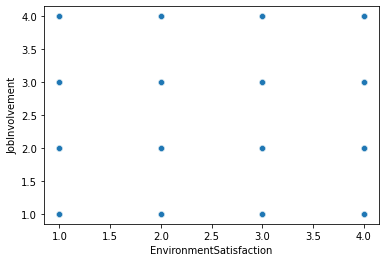

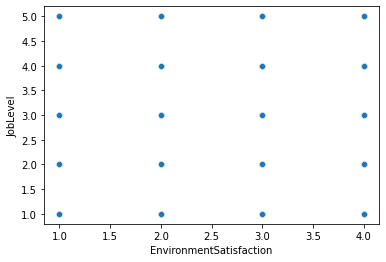

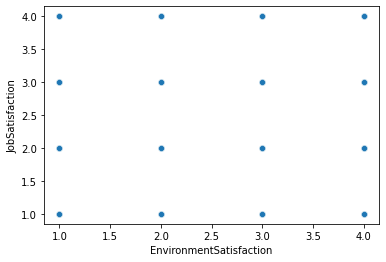

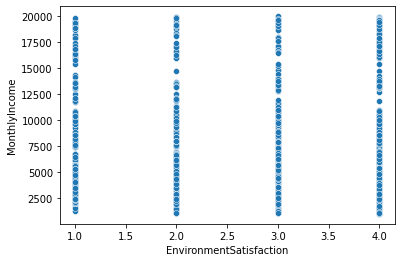

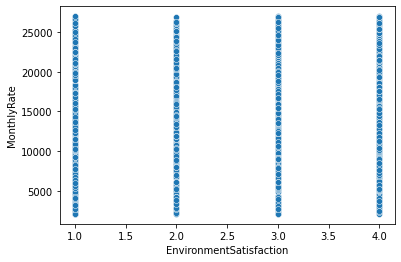

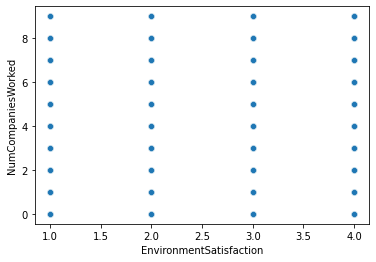

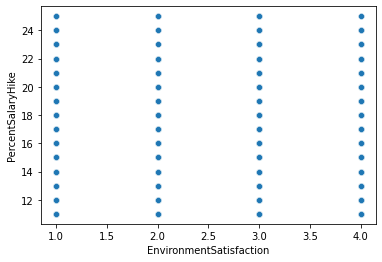

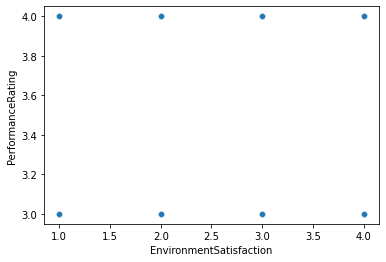

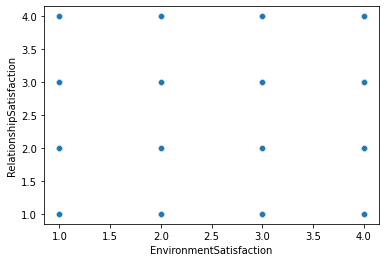

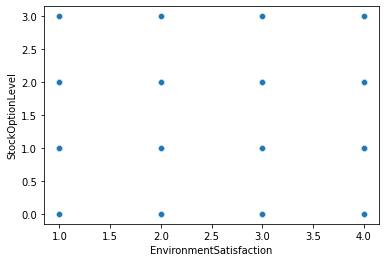

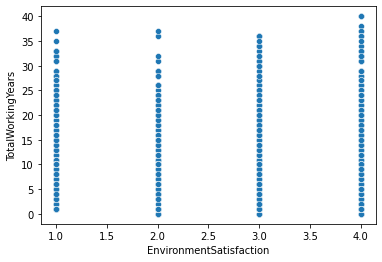

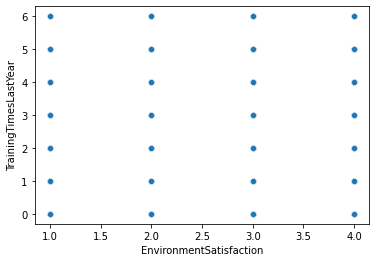

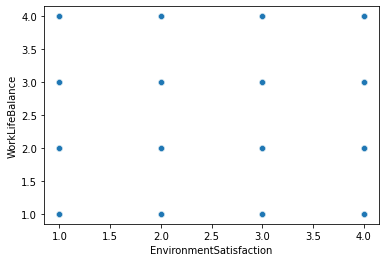

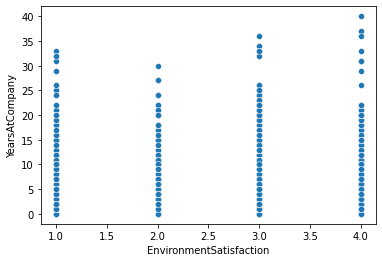

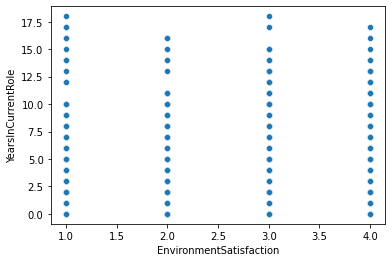

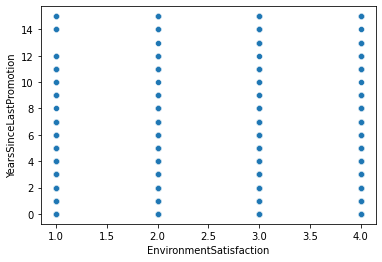

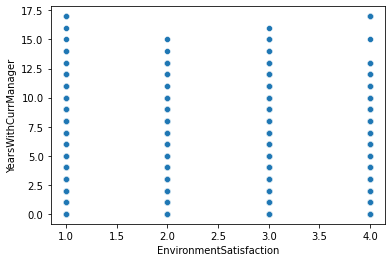

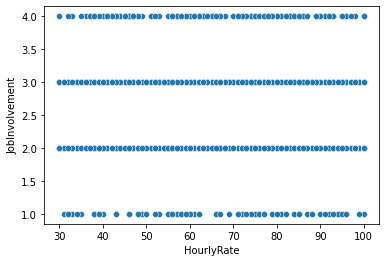

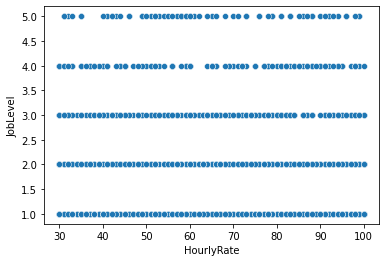

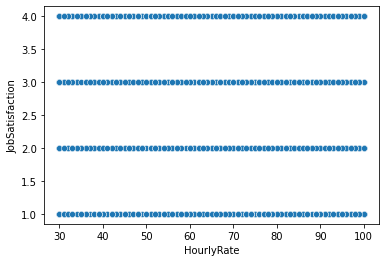

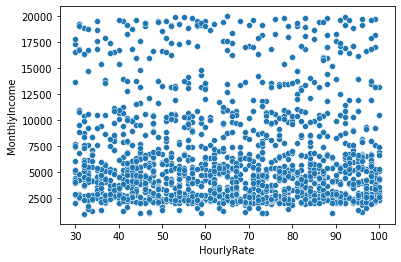

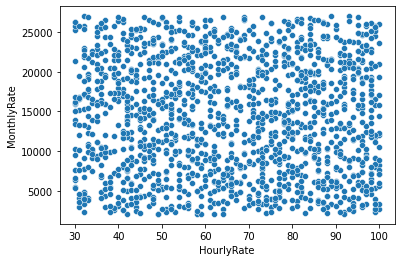

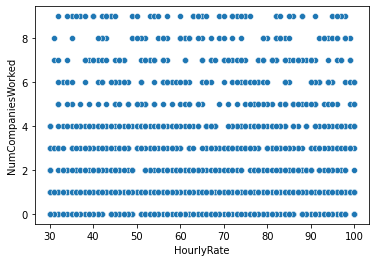

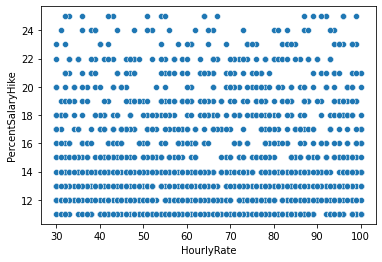

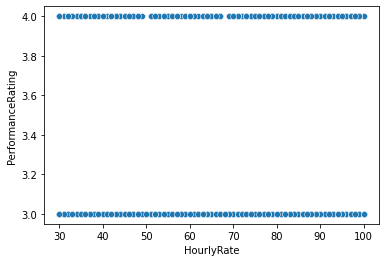

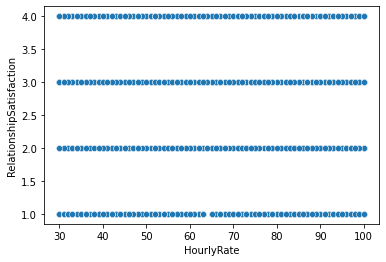

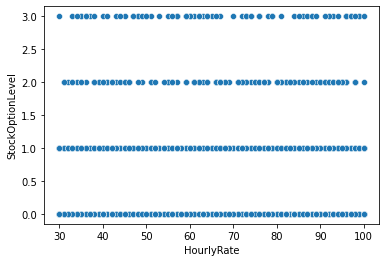

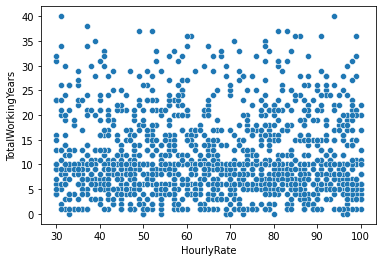

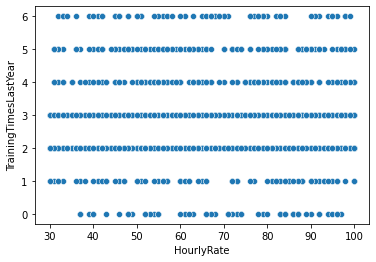

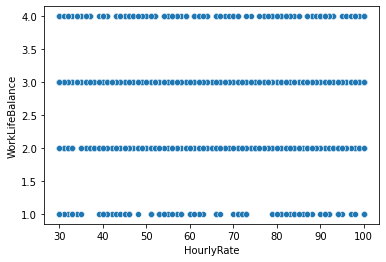

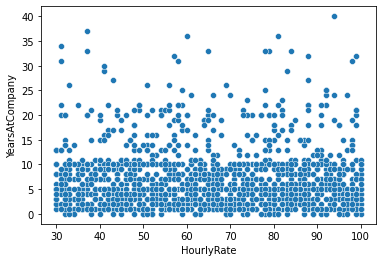

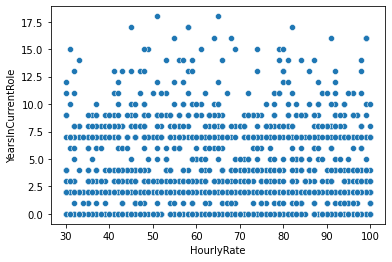

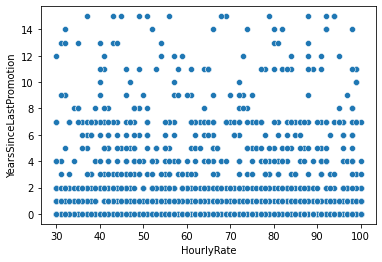

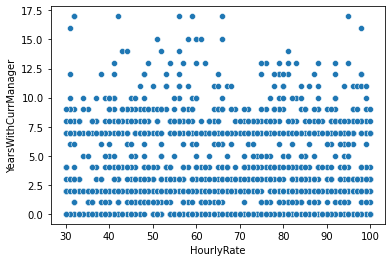

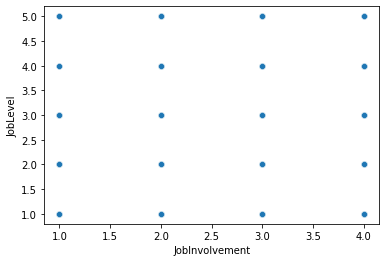

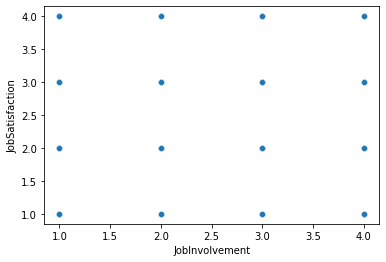

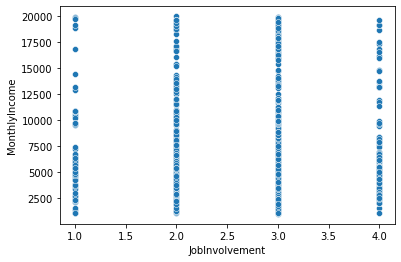

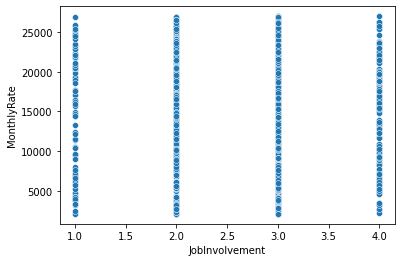

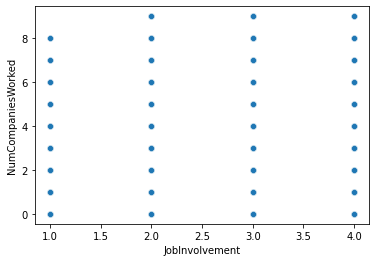

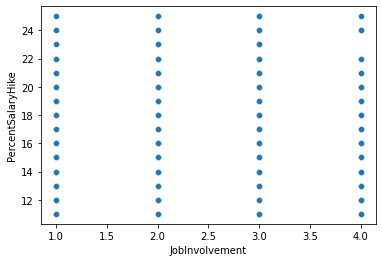

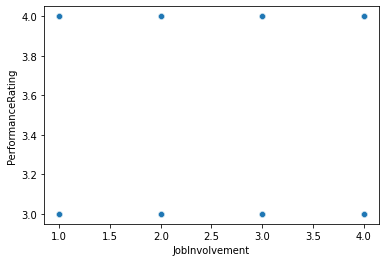

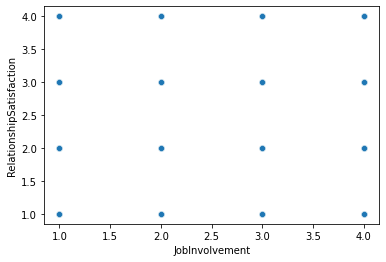

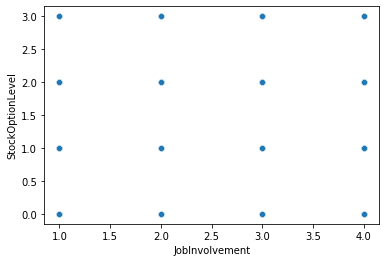

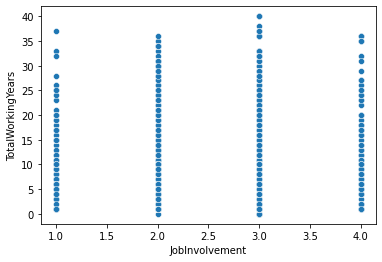

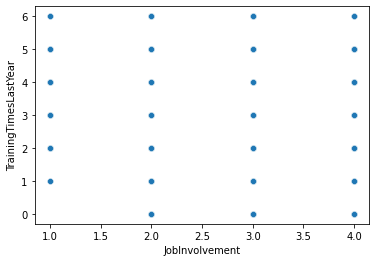

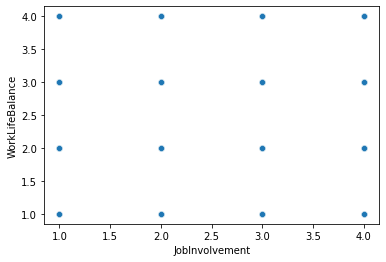

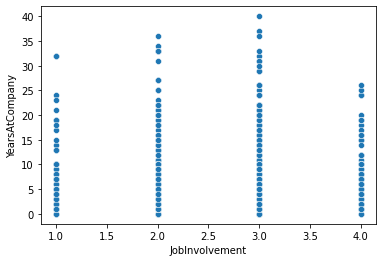

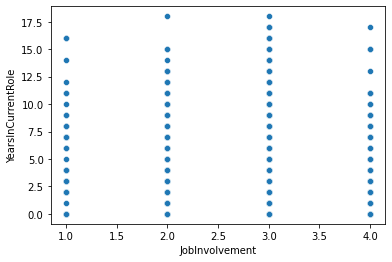

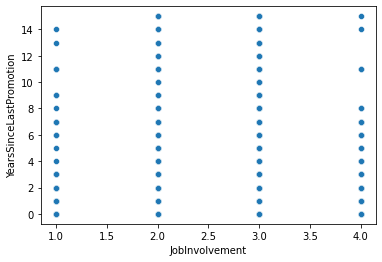

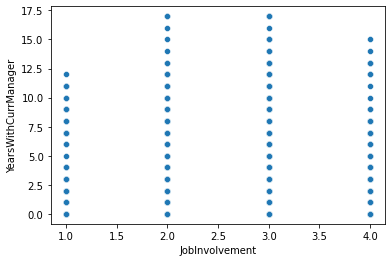

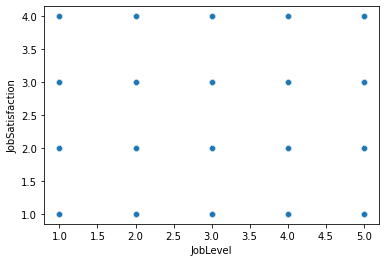

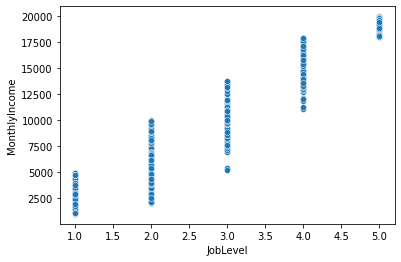

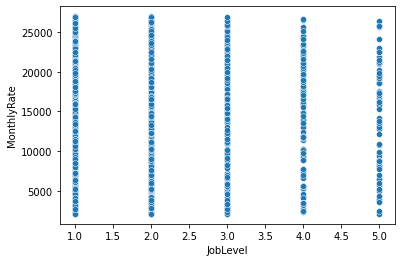

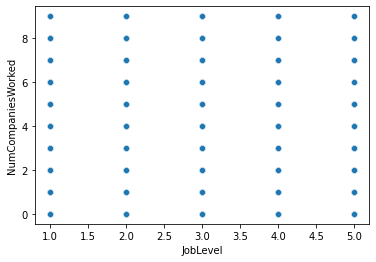

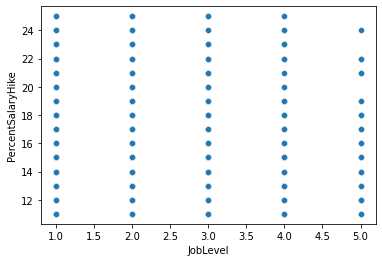

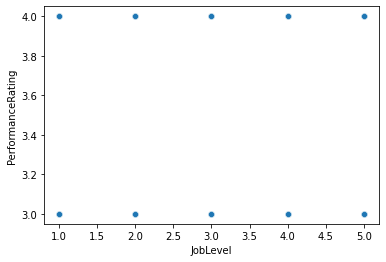

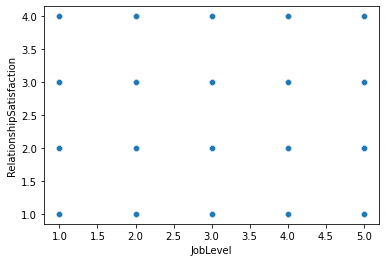

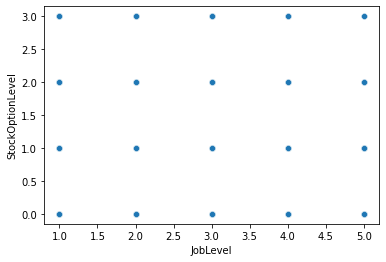

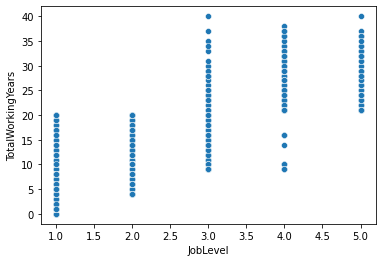

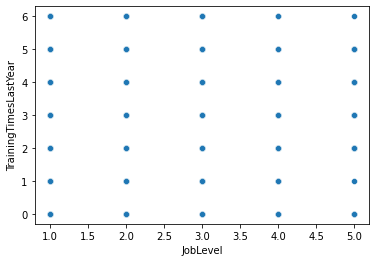

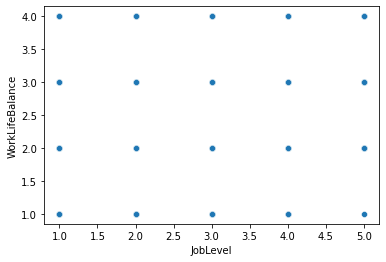

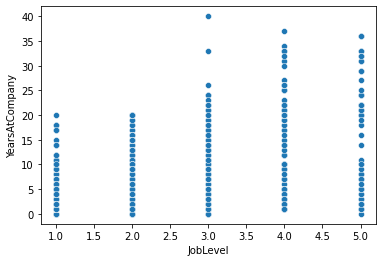

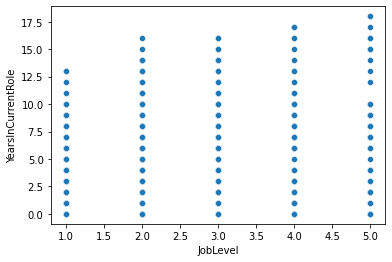

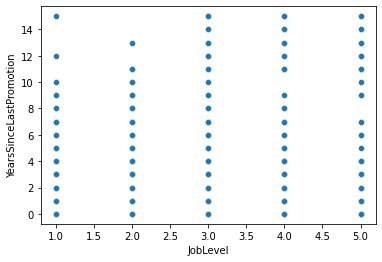

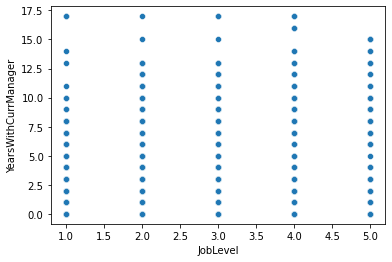

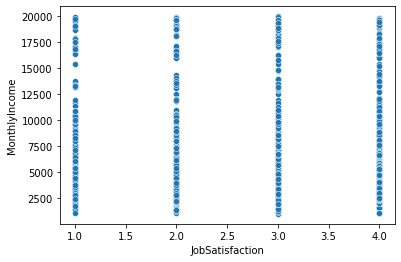

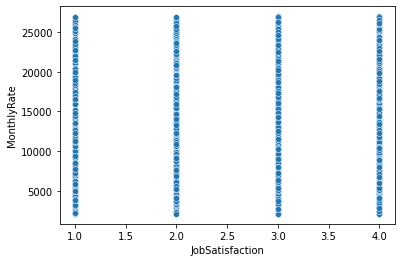

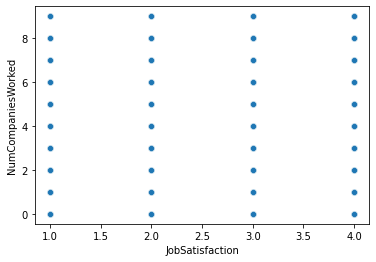

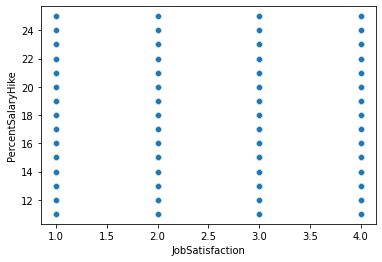

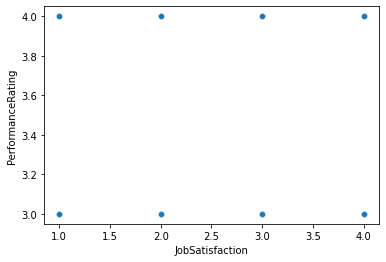

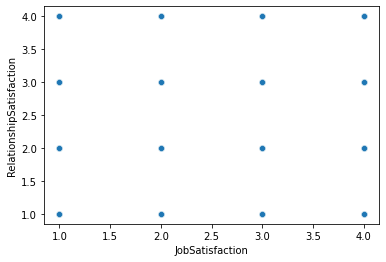

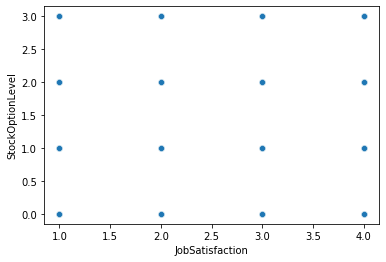

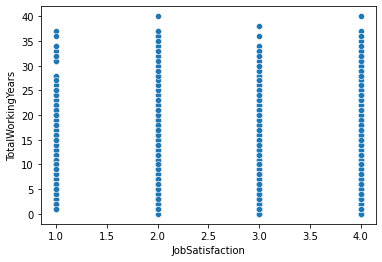

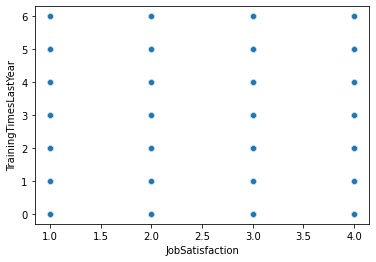

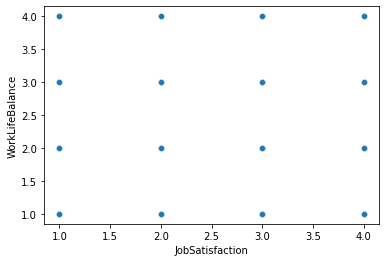

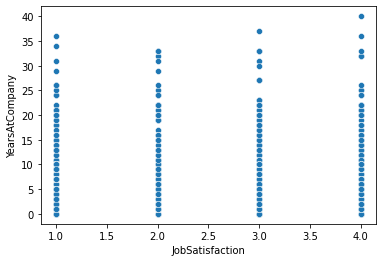

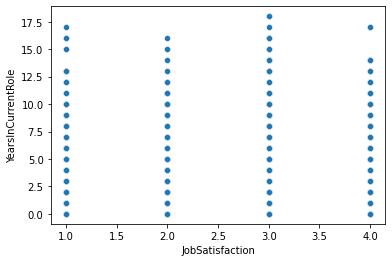

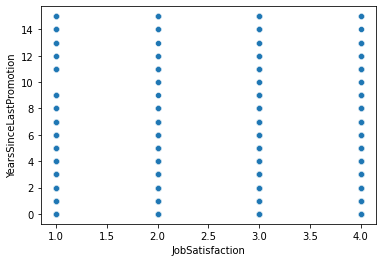

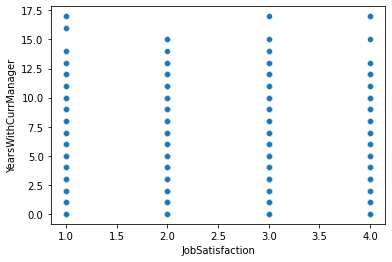

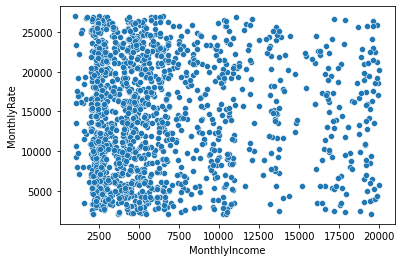

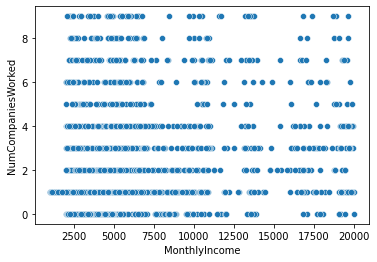

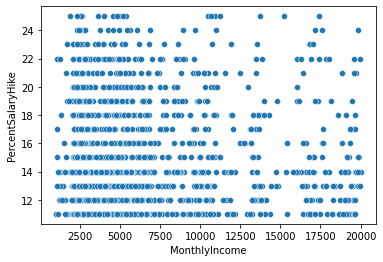

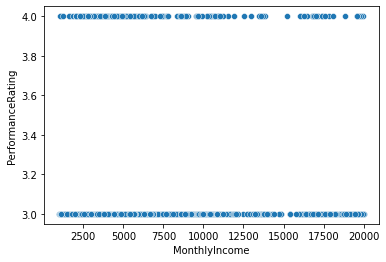

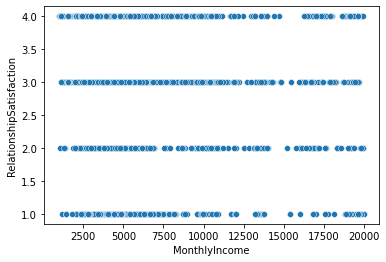

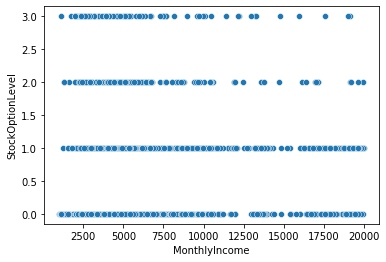

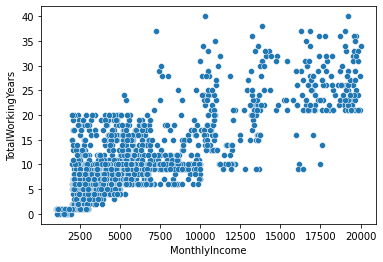

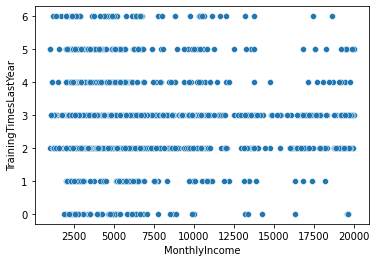

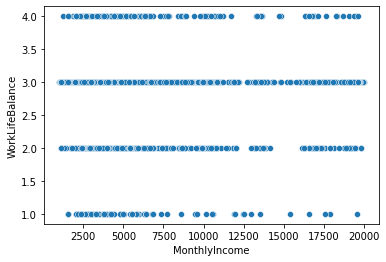

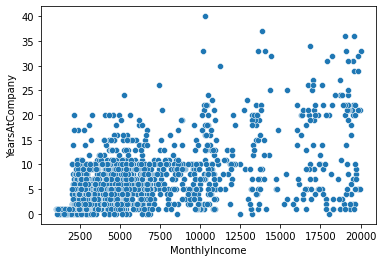

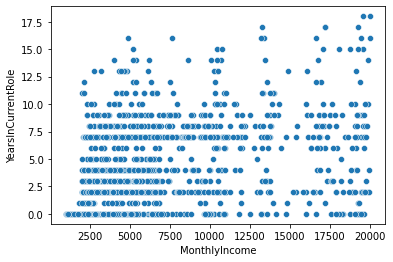

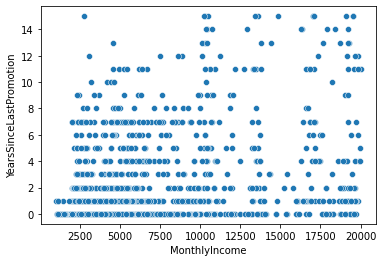

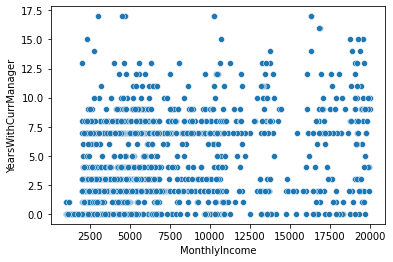

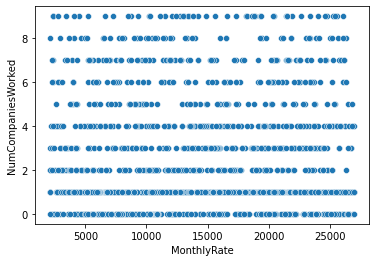

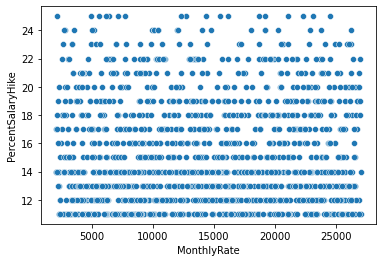

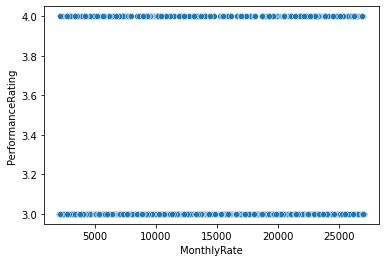

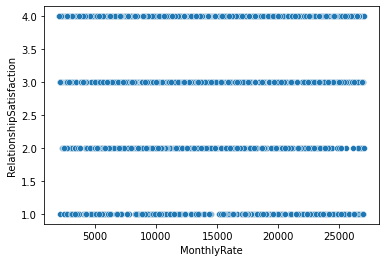

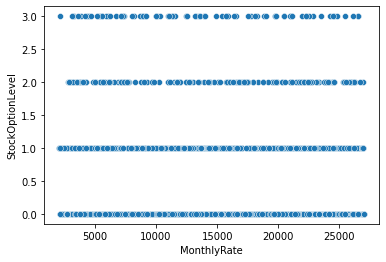

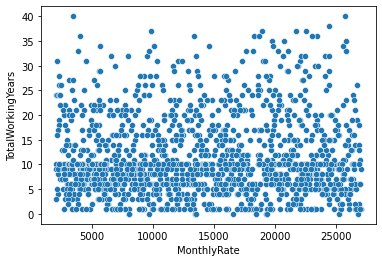

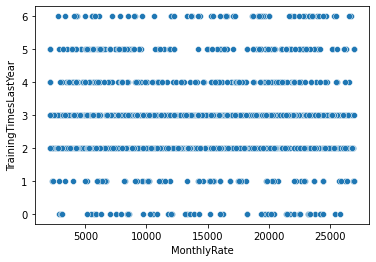

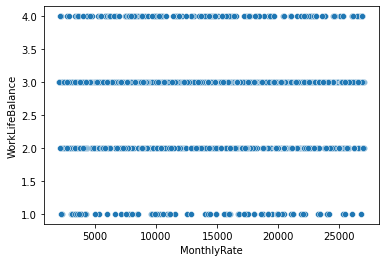

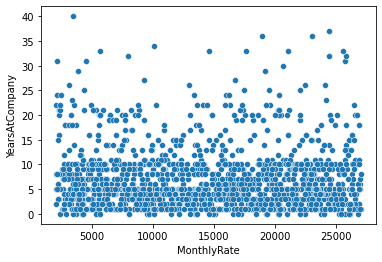

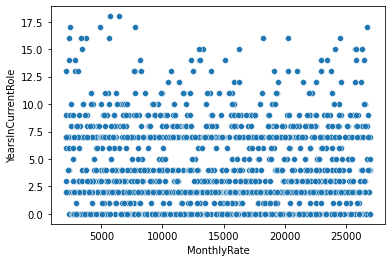

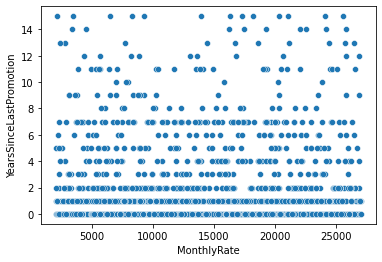

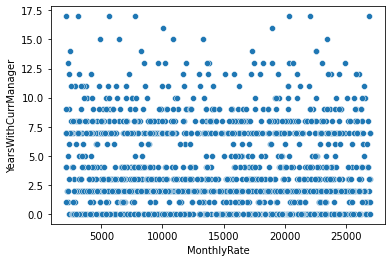

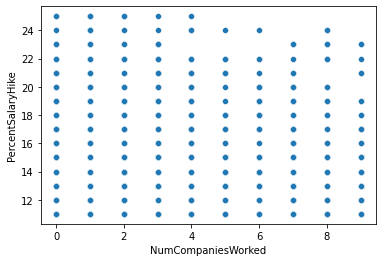

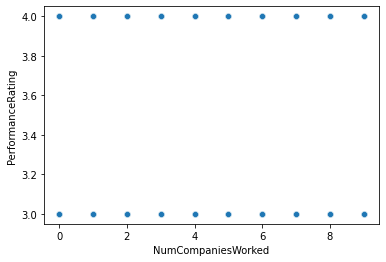

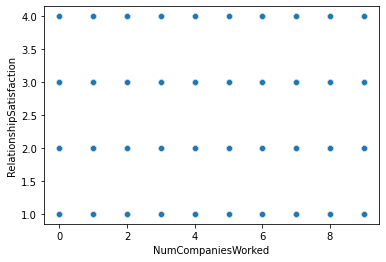

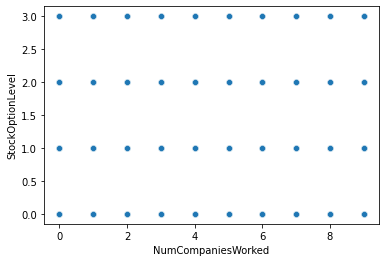

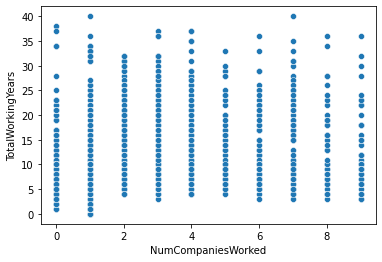

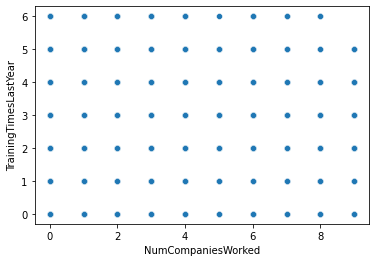

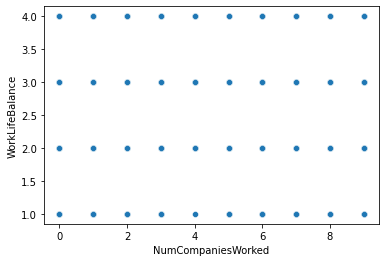

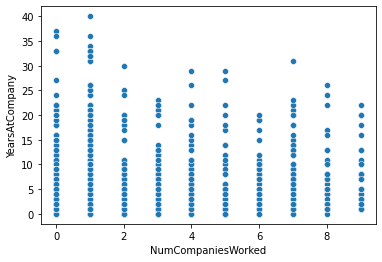

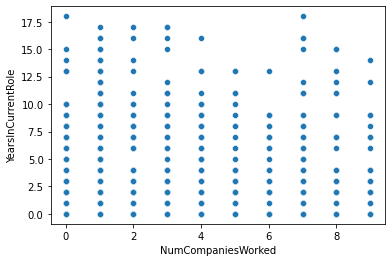

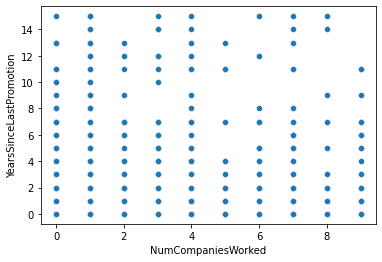

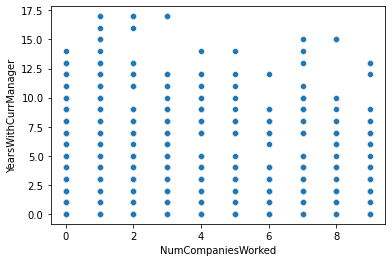

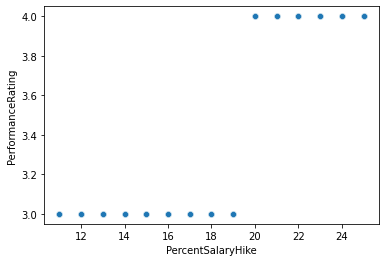

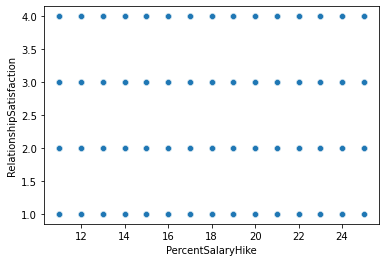

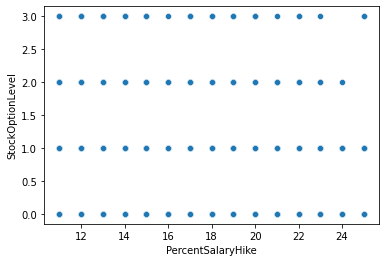

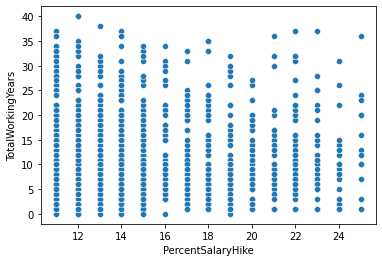

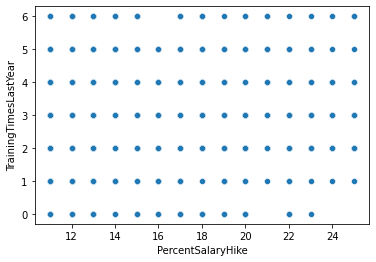

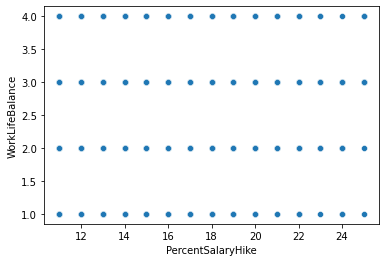

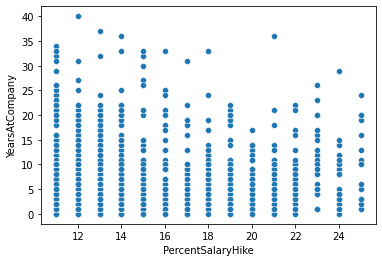

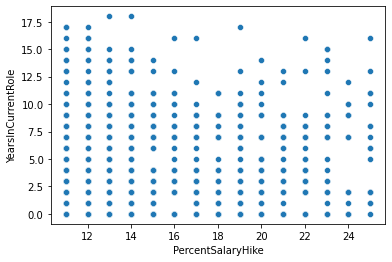

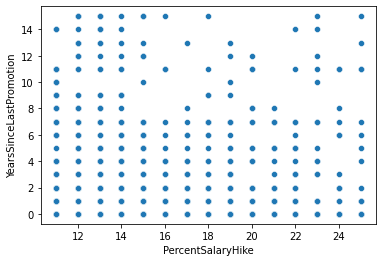

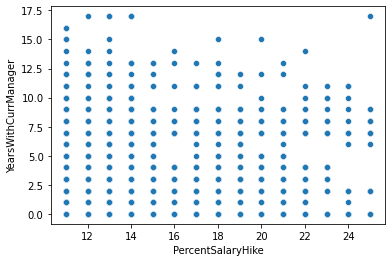

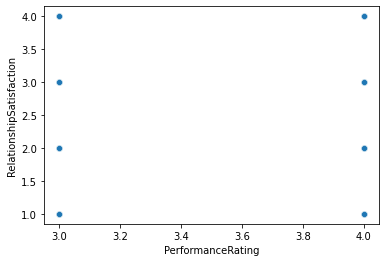

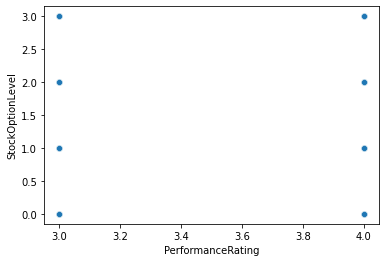

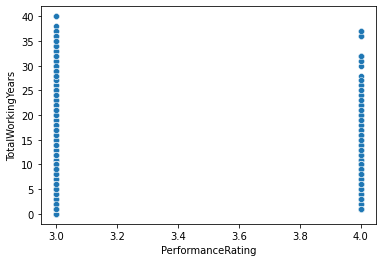

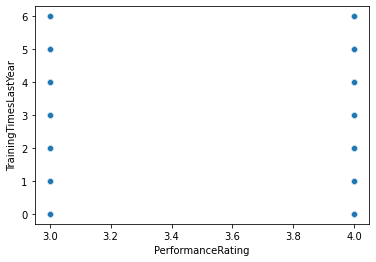

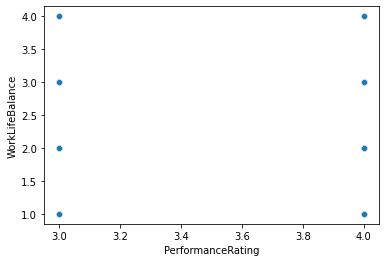

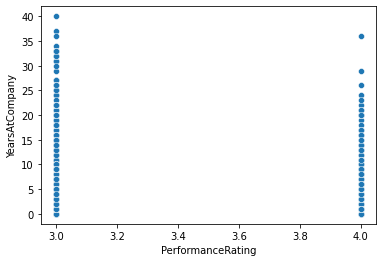

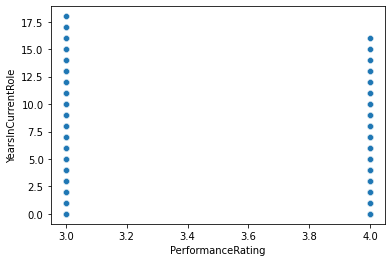

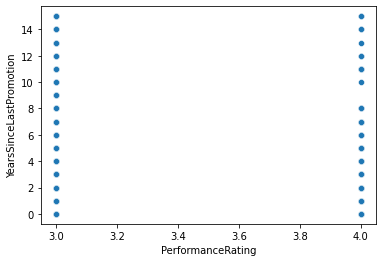

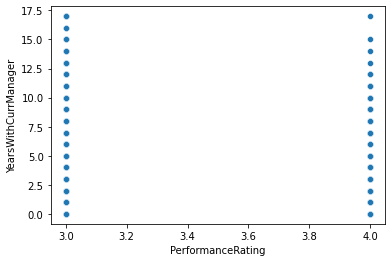

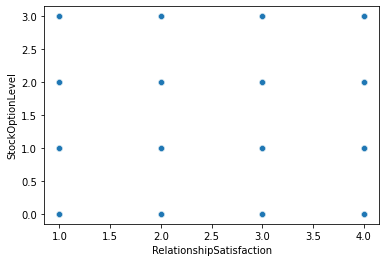

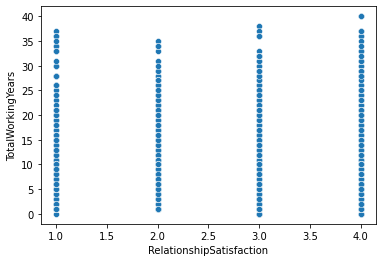

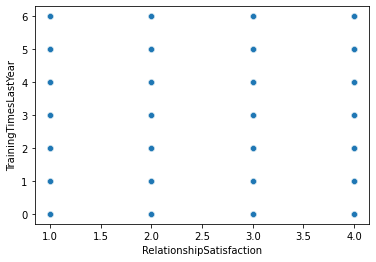

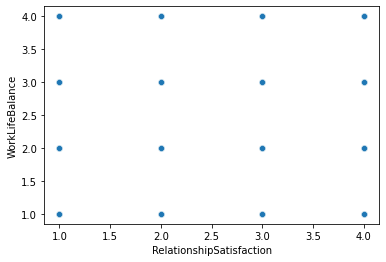

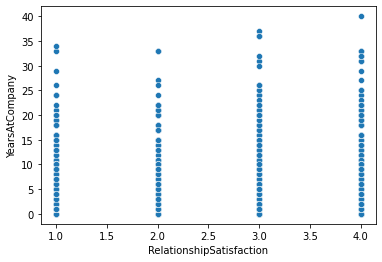

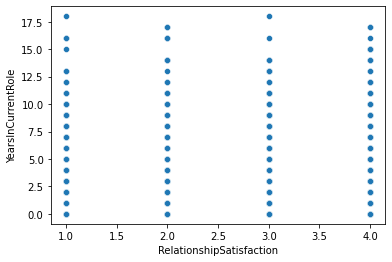

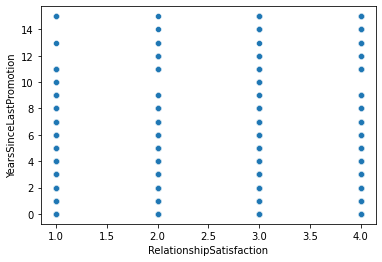

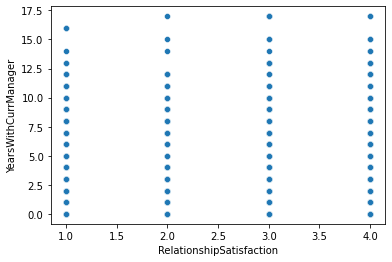

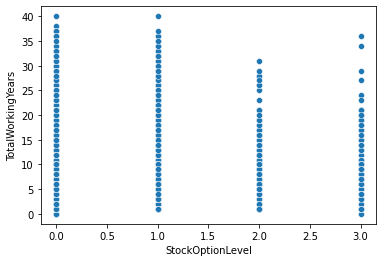

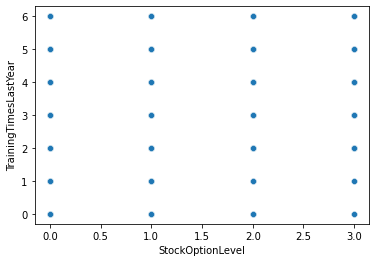

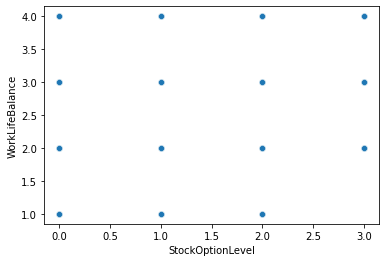

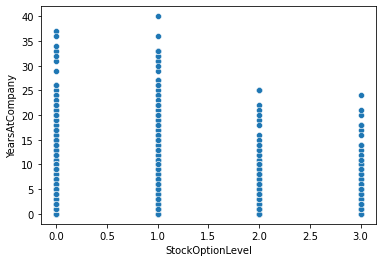

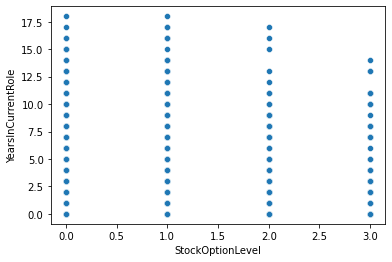

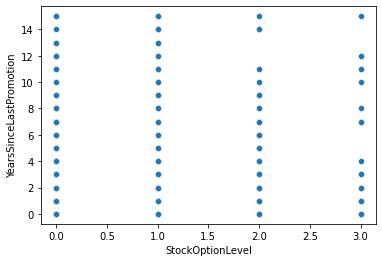

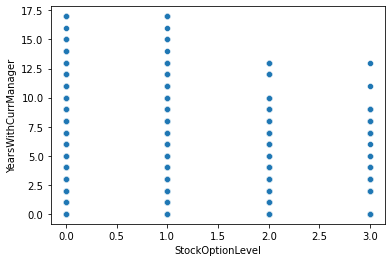

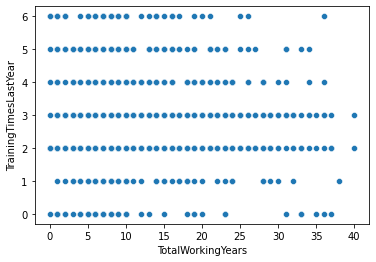

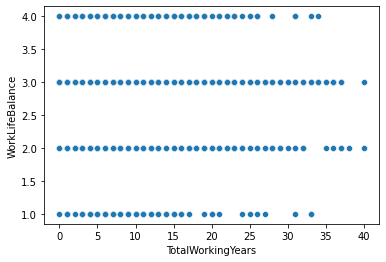

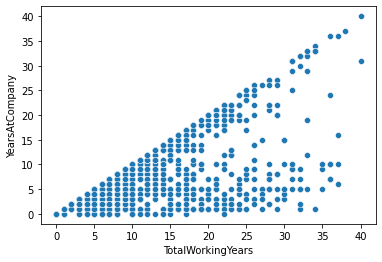

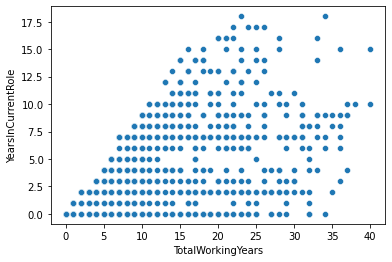

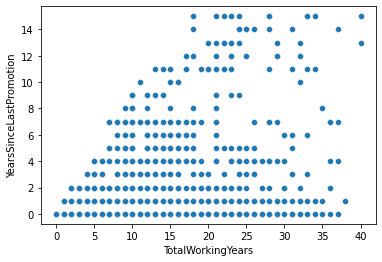

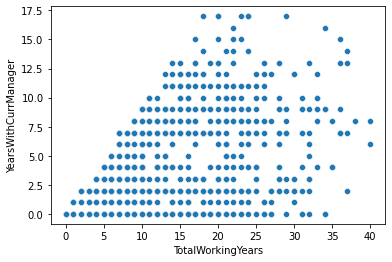

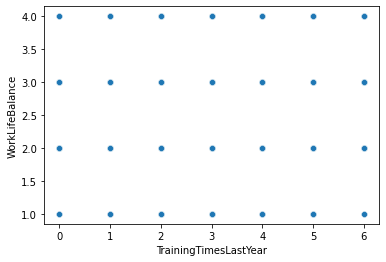

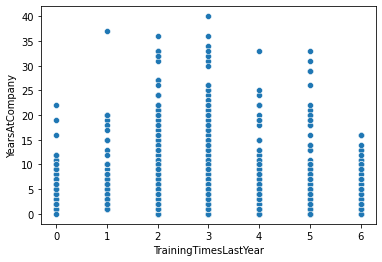

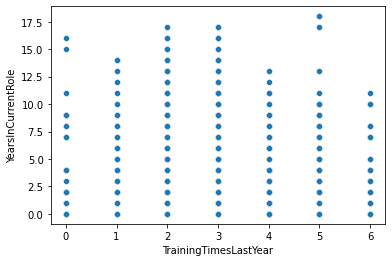

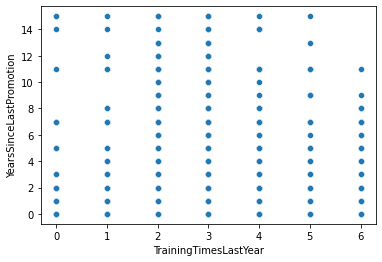

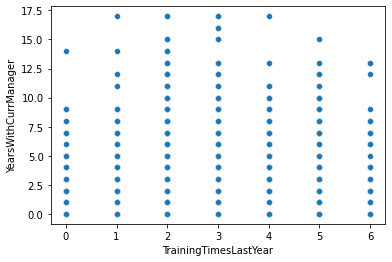

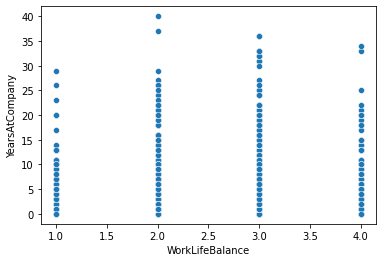

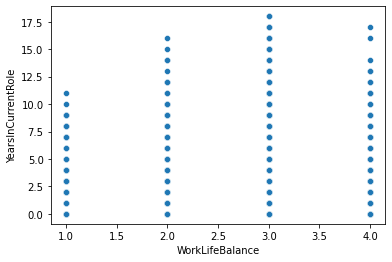

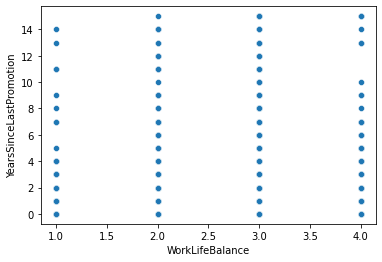

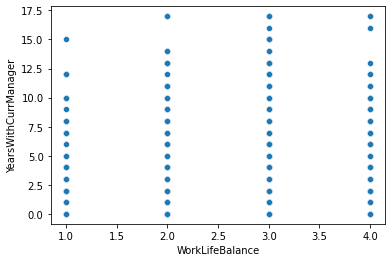

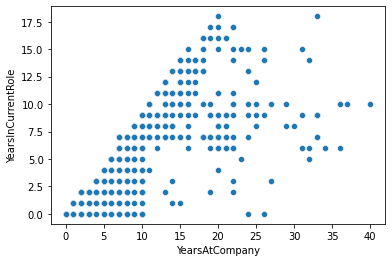

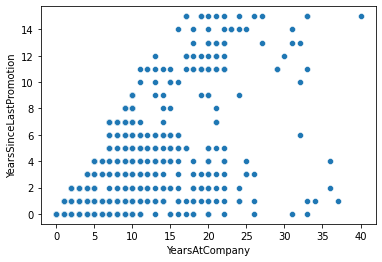

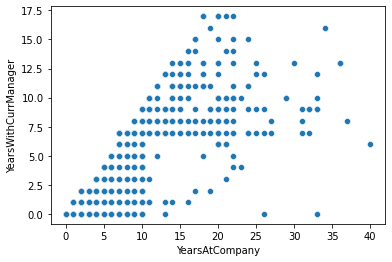

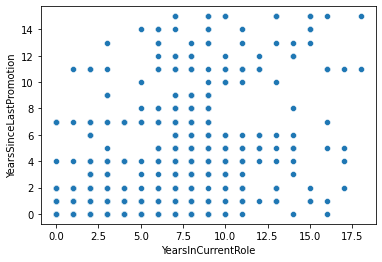

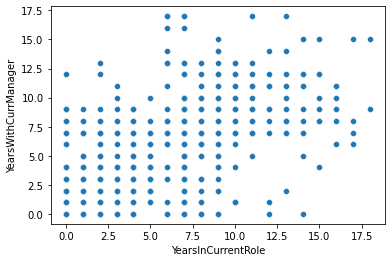

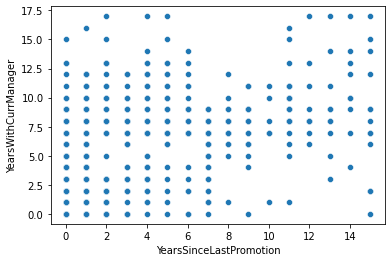

In [53]:
for i in range(len(int_col)):

    for j in int_col[i+1:]:    
        plt.figure()
        sns.scatterplot(df[int_col[i]], df[j])

In [54]:
# these mention columns are showing linear relation with each other

# age column is showing linear relation with yearsincelastpromotion, yearsincurrrole, yearatcompany, totalworking years

# some Linear Pattern found between TotalWorkingYears and Age columns
# Linear Pattern found between YearsAtCompany and Age columns
# YearAtCompany and TotalWorkingYears column is also shwoing some linear relation
# yearswithcurrmanager with yearsatcompany
# yearssinceleastpromotion with yearsatcompany
# yearssincurrentrole with yearsatcompany

# yearwithcurrManager with totalworkingyears
# yearssincelastpromotion with totalworkingyears
# yearssincurrentrole with totalworkingyears
# YearAtCompany with totalworkingyears

# totalworkingyears with monthlyincome

### Correlation of the columns

In [55]:
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  \
Age                       0.509604        -0.004892       0.497855   
DailyRate                 0.002966         0.030571       0.007707   
Dis

<AxesSubplot:>

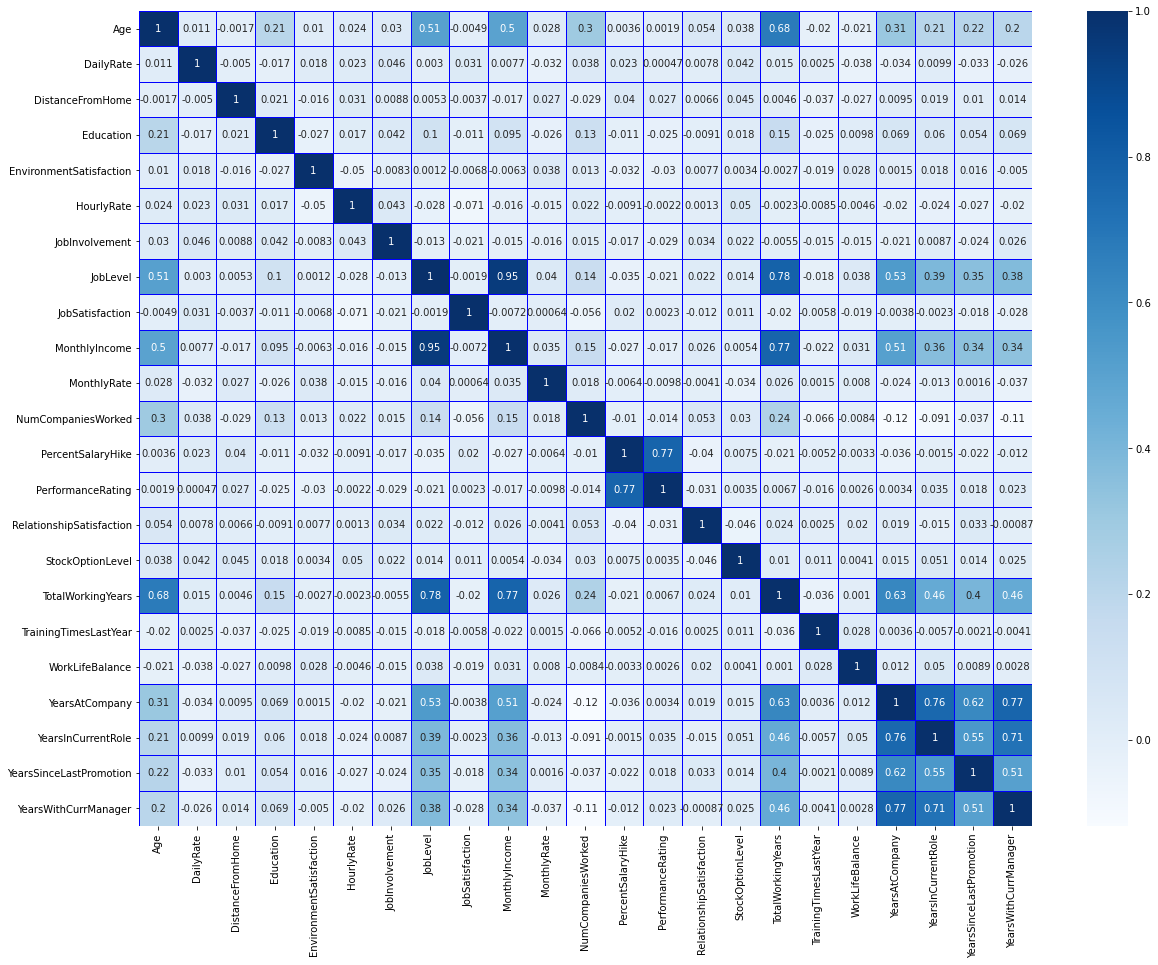

In [56]:
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 

In [57]:
# performancerating is highly correlated with percentSalaryhike
# TotalWOrkingYears is highly correlated with Age, JobLevel, monthlyIncome columns
# yearsAtcompany, YearInCurrentRole, YearSinceLastPromotion and YearWithCurrManager are showing correlation with each other
# Monthly Income and TotalWorkingYears also showing high correlation
# As many columns are showing Correlation, we need to work on it, to resolve this issue
# We will use VIF multicolinearity removing technique for the same

### Describe Data

In [58]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      1470.000000    1470.000000   1470.000000         1470.000000   
mean          2.728571    6502.931293  14313.103401            2.693197   
std           1.102846    4707.956783   7117.786044            2.498009   
min           1.000000    1009.000000   2094.000000            0.000000   
25%           2.000000    2911.000000   8047.000000            1.000000   
50%           3.000000    4919.000000  14235.500000            2.000000   
75%           4.000000    8379.000000  20461.500000            4.000000   
max           4.000000   19999.000000  26999.000000            9.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count        1470.000000        1470.000000               1470.000000   
mean           15.209524           3.153741                  2.712245   
std             3.659938           0.360824                  1.081209   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            18.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  


<AxesSubplot:>

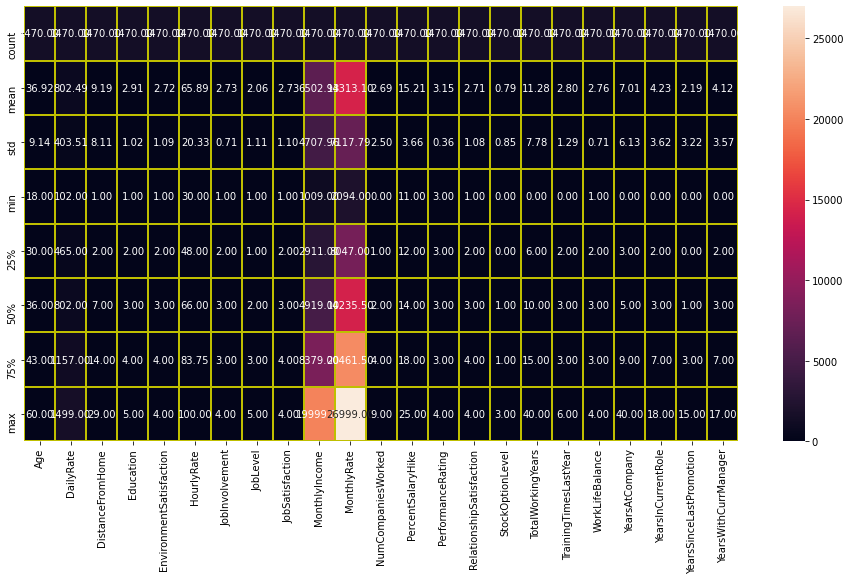

In [59]:
plt.figure(figsize = (16, 8))
sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'y', fmt = "0.2f")

In [60]:
# Age and DailyRate Columns Mean and 50% have not much difference, which is telling that this column is alomost normally distributed
# High difference found between mean and 50% in MonthlyRate column, need to convert his into normal distributed columns
# as maxium column are not much skewed or non normally distributed columns , but we observed that, we need to work on it

# Maximum columns are showing high std deviation from mean, which is indicating spread of data.
# Jabinvolvement column is showing less std value, mean less deviated from mean
# PerformanceRating column is not much spreaded

## Encoding

In [61]:
df.columns

# ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
#        'DistanceFromHome', 'Education', 'EducationField',
#        'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
#        'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
#        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
#        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
#        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
#        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
#        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
#       dtype='object')

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [62]:
from sklearn.preprocessing import LabelEncoder

#### Applying LabelEncoder to the Target Variable (Attrition)

In [63]:
le = LabelEncoder()

In [64]:
df['Attrition'] = le.fit_transform(df['Attrition'])

In [65]:
df.head(2)

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   

   Gender  HourlyRate  JobInvolvement  JobLevel             JobRole  \
0  Female          94               3         2     Sales Executive   
1    Male          61               2         2  Research Scientist   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7

#### Applying OneHotEncoder to other categorical columns

In [66]:
categorical = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [67]:
for i in categorical:
    print(i,'column having ',df[i].nunique(),'values')
#     print('\n')


# BusinessTravel column having  3 values
# Department column having  3 values
# EducationField column having  6 values
# Gender column having  2 values
# JobRole column having  9 values
# MaritalStatus column having  3 values
# OverTime column having  2 values

BusinessTravel column having  3 values
Department column having  3 values
EducationField column having  6 values
Gender column having  2 values
JobRole column having  9 values
MaritalStatus column having  3 values
OverTime column having  2 values


In [68]:
encoded_df = pd.get_dummies(df, columns = ['BusinessTravel', 'Department', 'EducationField','Gender', 'JobRole', 'MaritalStatus', 'OverTime'  ] )

In [69]:
encoded_df.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   
2                3           2090         2396                   6   
3                3           2909        23159                   1   
4                2           3468        16632                   9   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Non-Travel  \
0                        0                     5                          0   
1                        1                     7                          0   
2                        0                     0                          0   
3                        3                     0                          0   
4                        2                     2                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  0   
1                           0                                  1   
2                           0                                  1   
3                           0                                  1   
4                           0                                  1   

   Department_Sales  EducationField_Human Resources  \
0                 1                               0   
1                 0                               0   
2                 0                               0   
3                 0                               0   
4                 0                               0   

   EducationField_Lif

In [70]:
encoded_df.dtypes

Age                                  int64
Attrition                            int32
DailyRate                            int64
DistanceFromHome                     int64
Education                            int64
EnvironmentSatisfaction              int64
HourlyRate                           int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
MonthlyIncome                        int64
MonthlyRate                          int64
NumCompaniesWorked                   int64
PercentSalaryHike                    int64
PerformanceRating                    int64
RelationshipSatisfaction             int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
TrainingTimesLastYear                int64
WorkLifeBalance                      int64
YearsAtCompany                       int64
YearsInCurrentRole                   int64
YearsSinceLastPromotion              int64
YearsWithCu

In [71]:
encoded_df.shape
# (1470, 52)

(1470, 52)

In [72]:
encoded_df.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   
2   37          1       1373                 2          2   
3   33          0       1392                 3          4   
4   27          0        591                 2          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   
2                        4          92               2         1   
3                        4          56               3         1   
4                        1          40               3         1   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   
2                3           2090         2396                   6   
3                3           2909        23159                   1   
4                2           3468        16632                   9   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Non-Travel  \
0                        0                     5                          0   
1                        1                     7                          0   
2                        0                     0                          0   
3                        3                     0                          0   
4                        2                     2                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  0   
1                           0                                  1   
2                           0                                  1   
3                           0                                  1   
4                           0                                  1   

   Department_Sales  EducationField_Human Resources  \
0                 1                               0   
1                 0                               0   
2                 0                               0   
3                 0                               0   
4                 0                               0   

   EducationField_Lif

#### Checking impect of variables to the target variable

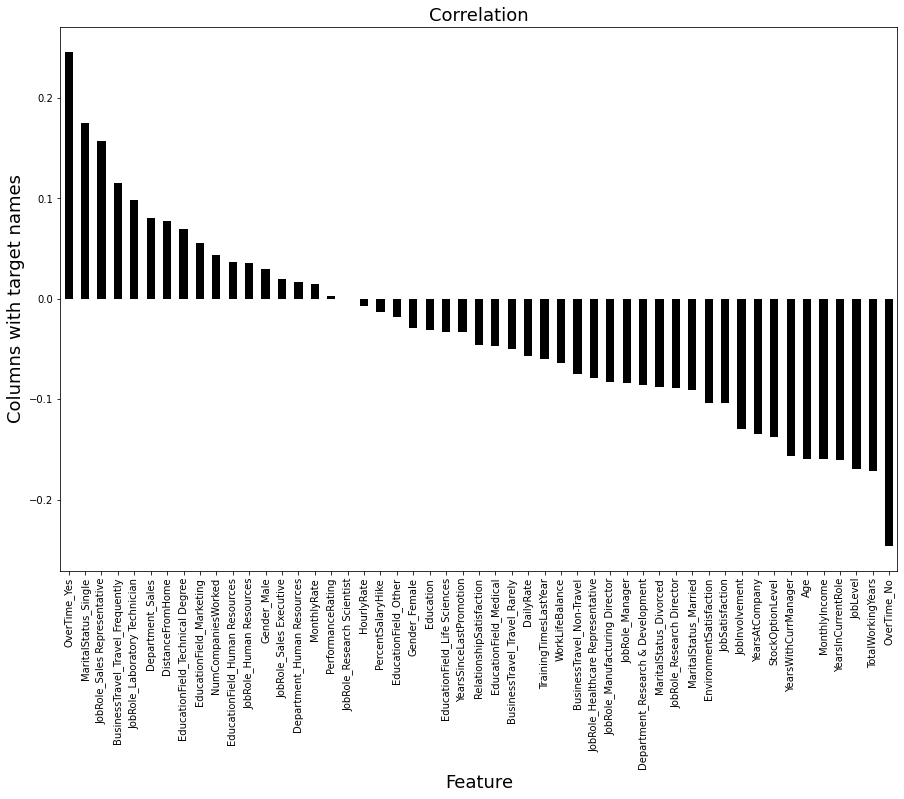

In [73]:
plt.figure(figsize = (15, 10))
encoded_df.corr()['Attrition'].sort_values(ascending = False).drop(['Attrition']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [118]:
# OverTime column is playing a important roll to predict attrition  (In both way positively and negatively )
# Performance Rating column is not contributing to predict attrition 
# Least positive contribution, getting by MonthlyRate
# and least negative from jobRolSearch DataScientist
# Top three positive contributors are OverTime, maritalStatus, Jobrole_Sale_Representative
# Top three negative contributors are OVertime, TotalWorking and Joblevel

### Remove Outliers

In [74]:
# using zscore technique

In [75]:
from scipy.stats import zscore

In [76]:
z = np.abs(zscore(encoded_df) )
df1_z = encoded_df[(z < 3).all(axis = 1)] 
df1_z.shape

# (732, 52)

(732, 52)

In [77]:
(encoded_df.shape[0] - df1_z.shape[0] ) / encoded_df.shape[0]

# 0.5020408163265306  # high loss of data we are facing by this method
# Can not use this method to remove outliers

# 0.5020408163265306

0.5020408163265306

In [78]:
# using IQR technique

In [79]:
Q1 = encoded_df.quantile(0.25)
Q3 = encoded_df.quantile(0.75)
IQR = Q3 - Q1 

In [80]:
df_IQR = encoded_df[~((encoded_df < (Q1 - 1.5*IQR) ) | (encoded_df > (Q3 + 1.5*IQR) )).any(axis = 1) ] 
df_IQR.shape   # Complete dataloss
# can not use this method too, as it is giving complete data loss

# (0, 52)

(0, 52)

In [81]:
# As both methods zscore and IQR method are giving high loss of data , therefore we will not remove outliers
# and perform preceeding on existing data

In [82]:
encoded_df.shape

# (1470, 52)

(1470, 52)

In [83]:
df.head(2)

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   

   Gender  HourlyRate  JobInvolvement  JobLevel             JobRole  \
0  Female          94               3         2     Sales Executive   
1    Male          61               2         2  Research Scientist   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7

### Seperating Data into x and y form

In [84]:
x = encoded_df.drop(columns = ['Attrition'])
x.shape

# (1470, 51)

(1470, 51)

In [85]:
y = encoded_df['Attrition']
y.shape

# (1470,)

(1470,)

In [86]:
x['PerformanceRating'].unique()

# array([3, 4], dtype=int64)

array([3, 4], dtype=int64)

### Apply SMOTE Technique as target variable is imbalanced 

In [87]:
y.value_counts()

# 0    1233
# 1     237
# Name: Attrition, dtype: int64

0    1233
1     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

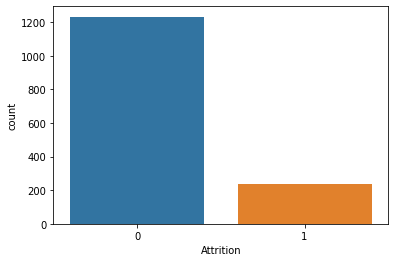

In [88]:
sns.countplot(y)

In [89]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [90]:
x, y = smote.fit_resample(x,y)

In [91]:
y.value_counts()

# 1    1233
# 0    1233
# Name: Attrition, dtype: int64

1    1233
0    1233
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

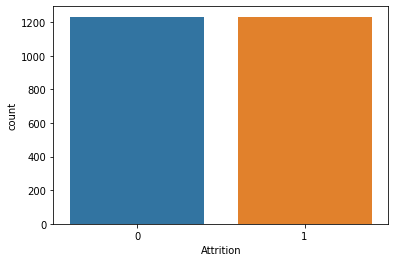

In [92]:
sns.countplot(y)

In [93]:
x['PerformanceRating'].unique()

# array([3, 4], dtype=int64)

array([3, 4], dtype=int64)

In [94]:
encoded_df.head(2)

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Non-Travel  \
0                        0                     5                          0   
1                        1                     7                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  0   
1                           0                                  1   

   Department_Sales  EducationField_Human Resources  \
0                 1                               0   
1                 0                               0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   

   EducationField_Technical Degree  Gender_Female  Gender_Male  \
0                                0              1            0   
1                                0              0            1   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                  0                        0   
1                                  0                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
0                      0                     1            0             1  
1                      1                     0            1             0

### Remove Skewness

In [95]:
x.skew()

# Age                                  0.552068
# DailyRate                            0.098857
# DistanceFromHome                     0.821932
# Education                           -0.105461
# EnvironmentSatisfaction             -0.024741
# HourlyRate                          -0.020858
# JobInvolvement                      -0.299092
# JobLevel                             1.278064
# JobSatisfaction                     -0.032314
# MonthlyIncome                        1.606108
# MonthlyRate                          0.006846
# NumCompaniesWorked                   1.003854
# PercentSalaryHike                    0.853169
# PerformanceRating                    2.628296
# RelationshipSatisfaction            -0.071830
# StockOptionLevel                     1.299185
# TotalWorkingYears                    1.341099
# TrainingTimesLastYear                0.545476
# WorkLifeBalance                     -0.438811
# YearsAtCompany                       2.117153
# YearsInCurrentRole                   1.152939
# YearsSinceLastPromotion              2.152625
# YearsWithCurrManager                 1.036704

Age                                  0.543217
DailyRate                            0.130652
DistanceFromHome                     0.858263
Education                           -0.119641
EnvironmentSatisfaction             -0.048587
HourlyRate                           0.056670
JobInvolvement                      -0.301322
JobLevel                             1.310773
JobSatisfaction                     -0.050976
MonthlyIncome                        1.623937
MonthlyRate                          0.013129
NumCompaniesWorked                   0.986816
PercentSalaryHike                    0.872451
PerformanceRating                    2.650372
RelationshipSatisfaction            -0.065434
StockOptionLevel                     1.308457
TotalWorkingYears                    1.328612
TrainingTimesLastYear                0.536254
WorkLifeBalance                     -0.430392
YearsAtCompany                       2.035292
YearsInCurrentRole                   1.162786
YearsSinceLastPromotion           

In [96]:
int_col

# Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
#        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
#        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
#        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
#        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
#        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
#        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
#       dtype='object')

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [97]:
skewed_col = [ 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'PercentSalaryHike',
              'YearsWithCurrManager', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear' ,'WorkLifeBalance' ,
              'YearsAtCompany' , 'YearsInCurrentRole', 'YearsSinceLastPromotion' , 'YearsWithCurrManager' ]

In [98]:
x['PerformanceRating'].unique()

# This column is showing only two type of unique values, 
# Therefore, it is okay when skewness is not removed from this column.

# array([3, 4], dtype=int64)

array([3, 4], dtype=int64)

In [99]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [100]:
x[int_col] = pt.fit_transform(x[int_col])

# applying to whole dataset, because giving better accuracy

In [101]:
x.skew()

# Age                                  0.000598
# DailyRate                           -0.146843
# DistanceFromHome                    -0.049710
# Education                           -0.064259
# EnvironmentSatisfaction             -0.109802
# HourlyRate                          -0.089817
# JobInvolvement                      -0.056675
# JobLevel                             0.235695
# JobSatisfaction                     -0.112650
# MonthlyIncome                        0.000000
# MonthlyRate                         -0.185353
# NumCompaniesWorked                   0.005923
# PercentSalaryHike                    0.110443
# PerformanceRating                    2.628296
# RelationshipSatisfaction            -0.114517
# StockOptionLevel                     0.387456
# TotalWorkingYears                   -0.013164
# TrainingTimesLastYear                0.066331
# WorkLifeBalance                     -0.059906
# YearsAtCompany                      -0.001060
# YearsInCurrentRole                  -0.028187
# YearsSinceLastPromotion              0.275716
# YearsWithCurrManager                -0.031261

Age                                 -0.000428
DailyRate                           -0.141278
DistanceFromHome                    -0.043204
Education                           -0.064858
EnvironmentSatisfaction             -0.115205
HourlyRate                          -0.072084
JobInvolvement                      -0.055412
JobLevel                             0.271122
JobSatisfaction                     -0.118119
MonthlyIncome                        0.000000
MonthlyRate                         -0.189361
NumCompaniesWorked                   0.001899
PercentSalaryHike                    0.105798
PerformanceRating                    0.000000
RelationshipSatisfaction            -0.116564
StockOptionLevel                     0.380130
TotalWorkingYears                   -0.016849
TrainingTimesLastYear                0.069889
WorkLifeBalance                     -0.058725
YearsAtCompany                      -0.000642
YearsInCurrentRole                  -0.026663
YearsSinceLastPromotion           

In [102]:
# Almost Every column is showing skewness value which is in acceptable range, Now, we move ahead

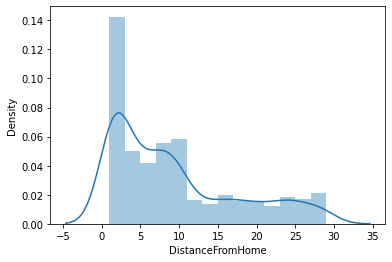

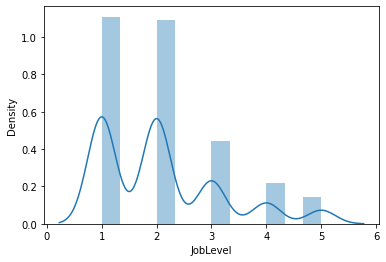

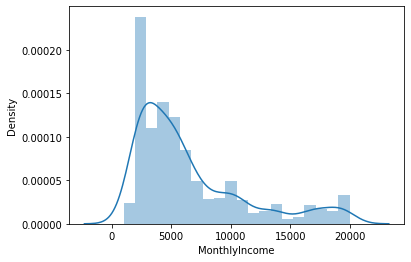

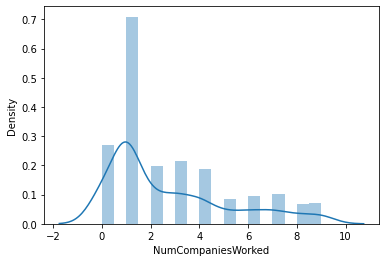

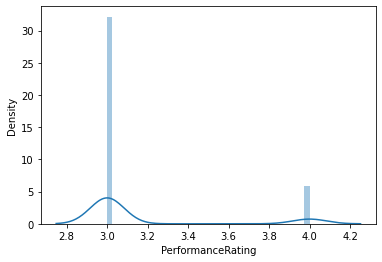

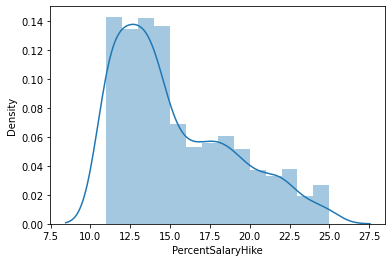

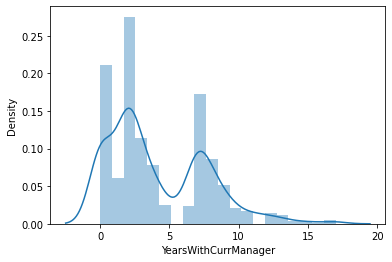

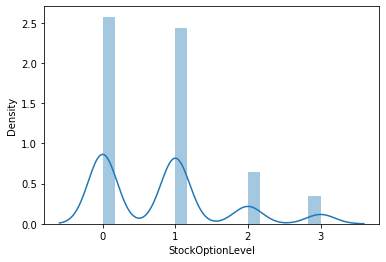

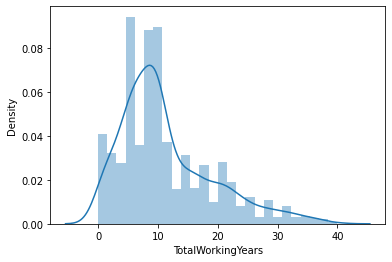

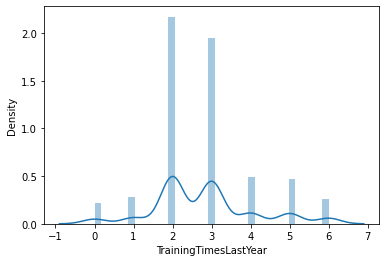

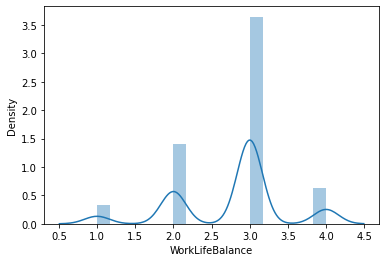

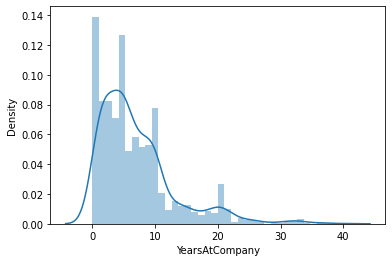

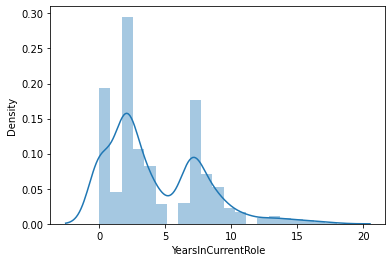

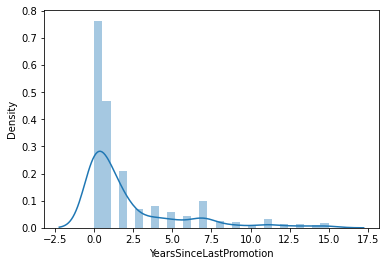

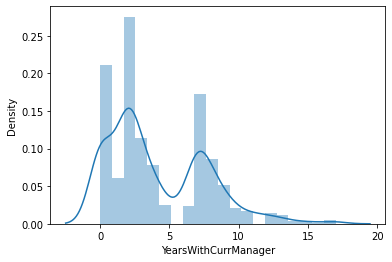

In [103]:
for i in skewed_col:
    plt.figure()
    sns.distplot(encoded_df[i])

In [104]:
encoded_df.head(2)

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Non-Travel  \
0                        0                     5                          0   
1                        1                     7                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  0   
1                           0                                  1   

   Department_Sales  EducationField_Human Resources  \
0                 1                               0   
1                 0                               0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   

   EducationField_Technical Degree  Gender_Female  Gender_Male  \
0                                0              1            0   
1                                0              0            1   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                  0                        0   
1                                  0                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
0                      0                     1            0             1  
1                      1                     0            1             0

### Multicoliearity

##### Using VIF Technique

In [105]:
# using VIF Technique
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
# function to calculate VIF
def cal_vif(data):   
    vif = pd.DataFrame()
    vif['Columns Name'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return (vif)

In [107]:
cal_vif(x)

Columns Name        VIF
0                                 Age   2.315857
1                           DailyRate   1.049961
2                    DistanceFromHome   1.047723
3                           Education   1.129994
4             EnvironmentSatisfaction   1.082934
5                          HourlyRate   1.050037
6                      JobInvolvement   1.118556
7                            JobLevel   4.493049
8                     JobSatisfaction   1.094112
9                       MonthlyIncome        NaN
10                        MonthlyRate   1.081958
11                 NumCompaniesWorked   1.422047
12                  PercentSalaryHike   1.047890
13                  PerformanceRating        NaN
14           RelationshipSatisfaction   1.071966
15                   StockOptionLevel   2.193493
16                  TotalWorkingYears   5.337412
17              TrainingTimesLastYear   1.060639
18                    WorkLifeBalance   1.121007
19                     YearsAtCompany   7.678303
20                 YearsInCurrentRole   4.285276
21            YearsSinceLastPromotion   1.645164
22               YearsWithCurrManager   3.815273
23          BusinessTravel_Non-Travel   1.650905
24   BusinessTravel_Travel_Frequently   2.180896
25       BusinessTravel_Travel_Rarely   5.453577
26         Department_Human Resources   8.618245
27  Department_Research & Development   9.704781
28                   Department_Sales  26.262815
29     EducationField_Human Resources   1.893077
30       EducationField_Life Sciences   3.876316
31           EducationField_Marketing   2.129626
32             EducationField_Medical   3.240380
33               EducationField_Other   1.415025
34    EducationField_Technical Degree   1.648488
35                      Gender_Female   3.263321
36                        Gender_Male   4.456188
37  JobRole_Healthcare Representative   2.487138
38            JobRole_Human Resources   7.250194
39      JobRole_Laboratory Technician   3.645378
40                    JobRole_Manager   3.018920
41     JobRole_Manufacturing Director   2.670067
42          JobRole_Research Director   2.123422
43         JobRole_Research Scientist   3.776764
44            JobRole_Sales Executive  20.742479
45       JobRole_Sales Representative   6.005791
46             MaritalStatus_Divorced   2.902616
47              MaritalStatus_Married   4.144489
48               MaritalStatus_Single   3.343797
49                        OverTime_No   5.212209
50                       OverTime_Yes   2.748486

In [108]:
# All columns are showing VIF which is in acceptable range, after applying skewness operation
# PerformaceRating and MonthlyRate are not impacting much to target variable

## Scaling

In [109]:
x.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.715704   0.891660         -1.609777  -0.772621                -0.438009   
1  1.425909  -1.353179          0.112060  -1.772091                 0.492570   
2  0.308710   1.487159         -1.182627  -0.772621                 1.380507   
3 -0.143011   1.527411         -0.863651   1.314224                 1.380507   
4 -0.930071  -0.384764         -1.182627  -1.772091                -1.429232   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0    1.482718        0.636491  0.618292         1.372593            0.0   
1   -0.175853       -0.728279  0.618292        -0.427186            0.0   
2    1.387716       -0.728279 -0.958633         0.494551            0.0   
3   -0.447977        0.636491 -0.958633         0.494551            0.0   
4   -1.372002        0.636491 -0.958633        -0.427186            0.0   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0     0.731167            1.703766          -1.532636                0.0   
1     1.368542           -0.618614           1.785941                0.0   
2    -1.867428            1.318171           0.256111                0.0   
3     1.168221           -0.618614          -1.532636                0.0   
4     0.376112            1.865131          -0.957277                0.0   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                 -1.456507         -0.852954           0.012921   
1                  1.393937          0.986485           0.296874   
2                 -0.465405         -0.852954          -0.147664   
3                  0.480418         -0.852954           0.012921   
4                  1.393937          0.986485          -0.324469   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0              -2.482102        -1.911436        0.385914            0.472010   
1               0.379447         0.529621        0.968697            1.102918   
2               0.379447         0.529621       -2.105729           -1.474619   
3               0.379447         0.529621        0.709767            1.102918   
4               0.379447         0.529621       -0.702468           -0.180507   

   YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Non-Travel  \
0                -1.004078              0.745820                          0   
1                 0.258918              1.124334                          0   
2                -1.004078             -1.399266                          0   
3                 1.038867             -1.399266                          0   
4                 0.759963             -0.126125                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  0   
1                           0                                  1   
2                           0                                  1   
3                           0                                  1   
4                           0                                  1   

   Department_Sales  EducationField_Human Resources  \
0                 1                               0   
1                 0                               0   
2                 0                               0   
3                 0                               0   
4                 0                               0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1 

In [110]:
encoded_df.head(2)

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Non-Travel  \
0                        0                     5                          0   
1                        1                     7                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  0   
1                           0                                  1   

   Department_Sales  EducationField_Human Resources  \
0                 1                               0   
1                 0                               0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   

   EducationField_Technical Degree  Gender_Female  Gender_Male  \
0                                0              1            0   
1                                0              0            1   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                  0                        0   
1                                  0                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
0                      0                     1            0             1  
1                      1                     0            1             0

In [111]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [112]:
int_col

# Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
#        'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
#        'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
#        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
#        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
#        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
#        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
#       dtype='object')

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [113]:
x[int_col] = ss.fit_transform(x[int_col])

In [114]:
x.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.715704   0.891660         -1.609777  -0.772621                -0.438009   
1  1.425909  -1.353179          0.112060  -1.772091                 0.492570   
2  0.308710   1.487159         -1.182627  -0.772621                 1.380507   
3 -0.143011   1.527411         -0.863651   1.314224                 1.380507   
4 -0.930071  -0.384764         -1.182627  -1.772091                -1.429232   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0    1.482718        0.636491  0.618292         1.372593            0.0   
1   -0.175853       -0.728279  0.618292        -0.427186            0.0   
2    1.387716       -0.728279 -0.958633         0.494551            0.0   
3   -0.447977        0.636491 -0.958633         0.494551            0.0   
4   -1.372002        0.636491 -0.958633        -0.427186            0.0   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0     0.731167            1.703766          -1.532636                0.0   
1     1.368542           -0.618614           1.785941                0.0   
2    -1.867428            1.318171           0.256111                0.0   
3     1.168221           -0.618614          -1.532636                0.0   
4     0.376112            1.865131          -0.957277                0.0   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                 -1.456507         -0.852954           0.012921   
1                  1.393937          0.986485           0.296874   
2                 -0.465405         -0.852954          -0.147664   
3                  0.480418         -0.852954           0.012921   
4                  1.393937          0.986485          -0.324469   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0              -2.482102        -1.911436        0.385914            0.472010   
1               0.379447         0.529621        0.968697            1.102918   
2               0.379447         0.529621       -2.105729           -1.474619   
3               0.379447         0.529621        0.709767            1.102918   
4               0.379447         0.529621       -0.702468           -0.180507   

   YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Non-Travel  \
0                -1.004078              0.745820                          0   
1                 0.258918              1.124334                          0   
2                -1.004078             -1.399266                          0   
3                 1.038867             -1.399266                          0   
4                 0.759963             -0.126125                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  0   
1                           0                                  1   
2                           0                                  1   
3                           0                                  1   
4                           0                                  1   

   Department_Sales  EducationField_Human Resources  \
0                 1                               0   
1                 0                               0   
2                 0                               0   
3                 0                               0   
4                 0                               0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1 

In [115]:
encoded_df.head(2)

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0   41          1       1102                 1          2   
1   49          0        279                 8          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        2          94               3         2   
1                        3          61               2         2   

   JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
0                4           5993        19479                   8   
1                2           5130        24907                   1   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Non-Travel  \
0                        0                     5                          0   
1                        1                     7                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  0   
1                           0                                  1   

   Department_Sales  EducationField_Human Resources  \
0                 1                               0   
1                 0                               0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   

   EducationField_Technical Degree  Gender_Female  Gender_Male  \
0                                0              1            0   
1                                0              0            1   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                                  0                        0   
1                                  0                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
0                      0                     1            0             1  
1                      1                     0            1             0

### Machine Learning

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [120]:
def best_randomstate (model, x, y):
    best_fit = []
    for i in range(0, 200 ) :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(m_predict_train, y_train)
        testing = accuracy_score(m_predict_test, y_test)

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

        if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
            best_fit.append(i)
    return (best_fit)

In [121]:
def check_model (model, x, y, r_list):
    for i in r_list :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(m_predict_train, y_train)
        testing = accuracy_score(m_predict_test, y_test)

        print('At random state', i, 'the training accuracy is :-', training)
        print('At random state', i, 'the testing accuracy is :-', testing) 
        print('_________________________________________________________________')

In [122]:
def train(algo, x, y, best_fit):
    # train the model
    model = algo()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    m_pred = model.predict(x_train)
    
    training = accuracy_score(m_pred, y_train)
    testing = accuracy_score(pred, y_test)

    print('Training accuracy is :-', training)
    print('Testing accuracy is :-', testing) 
    
    print('__________________________________________________________________')
    print('Classification Report: \n', classification_report(pred, y_test) )
    print('Confusion Matrix: \n', confusion_matrix(pred, y_test) )
    print('___________________________________________________________________')
    print('Cross value score')
    
    # perform cross-validation
    for i in range(4, 12):
        cv_score = cross_val_score(model, x, y, cv = i ).mean()
        print('cv score',  cv_score ,'at', i, 'cross fold')


#### Model 1: LogisticRegression

In [123]:
random_state = best_randomstate(LogisticRegression, x, y)
print(random_state)

[0, 2, 9, 13, 14, 15, 16, 17, 18, 19, 20, 22, 25, 26, 27, 29, 30, 31, 32, 35, 36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 54, 56, 57, 58, 59, 61, 63, 64, 66, 67, 68, 71, 73, 74, 76, 81, 83, 84, 85, 86, 89, 91, 93, 95, 97, 100, 101, 103, 105, 108, 109, 110, 111, 112, 113, 114, 118, 119, 121, 122, 123, 124, 125, 127, 128, 130, 131, 132, 133, 134, 136, 138, 139, 147, 148, 150, 152, 153, 154, 155, 156, 159, 160, 161, 162, 166, 167, 168, 170, 171, 175, 176, 178, 179, 182, 183, 193, 194, 195, 197, 198]


In [124]:
check_model(LogisticRegression, x, y, random_state )

At random state 0 the training accuracy is :- 0.93279258400927
At random state 0 the testing accuracy is :- 0.9405405405405406
_________________________________________________________________
At random state 2 the training accuracy is :- 0.9385863267670915
At random state 2 the testing accuracy is :- 0.9364864864864865
_________________________________________________________________
At random state 9 the training accuracy is :- 0.9345307068366164
At random state 9 the testing accuracy is :- 0.9324324324324325
_________________________________________________________________
At random state 13 the training accuracy is :- 0.9380069524913094
At random state 13 the testing accuracy is :- 0.927027027027027
_________________________________________________________________
At random state 14 the training accuracy is :- 0.9339513325608343
At random state 14 the testing accuracy is :- 0.9351351351351351
_________________________________________________________________
At random state 15 the t

At random state 67 the training accuracy is :- 0.9368482039397451
At random state 67 the testing accuracy is :- 0.927027027027027
_________________________________________________________________
At random state 68 the training accuracy is :- 0.9322132097334879
At random state 68 the testing accuracy is :- 0.9418918918918919
_________________________________________________________________
At random state 71 the training accuracy is :- 0.9322132097334879
At random state 71 the testing accuracy is :- 0.9405405405405406
_________________________________________________________________
At random state 73 the training accuracy is :- 0.9374275782155272
At random state 73 the testing accuracy is :- 0.9364864864864865
_________________________________________________________________
At random state 74 the training accuracy is :- 0.936268829663963
At random state 74 the testing accuracy is :- 0.9310810810810811
_________________________________________________________________
At random state 7

At random state 139 the training accuracy is :- 0.936268829663963
At random state 139 the testing accuracy is :- 0.927027027027027
_________________________________________________________________
At random state 147 the training accuracy is :- 0.9380069524913094
At random state 147 the testing accuracy is :- 0.9351351351351351
_________________________________________________________________
At random state 148 the training accuracy is :- 0.9426419466975666
At random state 148 the testing accuracy is :- 0.927027027027027
_________________________________________________________________
At random state 150 the training accuracy is :- 0.9397450753186558
At random state 150 the testing accuracy is :- 0.927027027027027
_________________________________________________________________
At random state 152 the training accuracy is :- 0.9432213209733488
At random state 152 the testing accuracy is :- 0.9283783783783783
_________________________________________________________________
At random

In [125]:
# As accuracy of testing data nd training data is almost for each randome state
# at random state of 94, its giving maxium accuracy of 94%

In [159]:
train(LogisticRegression, x, y, 58)

Training accuracy is :- 0.936268829663963
Testing accuracy is :- 0.9351351351351351
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       406
           1       0.90      0.96      0.93       334

    accuracy                           0.94       740
   macro avg       0.93      0.94      0.93       740
weighted avg       0.94      0.94      0.94       740

Confusion Matrix: 
 [[371  35]
 [ 13 321]]
___________________________________________________________________
Cross value score
cv score 0.8926032435959501 at 4 cross fold
cv score 0.8914528089610826 at 5 cross fold
cv score 0.9022708840227089 at 6 cross fold
cv score 0.9145577333431439 at 7 cross fold
cv score 0.9182283129491867 at 8 cross fold
cv score 0.9176804541768045 at 9 cross fold
cv score 0.9194035746025477 at 10 cross fold
cv score 0.9211165223665223 at 11 cross fold


In [127]:
# As we can see in above observation , 
# training accuracy, testing accuracy and cv score at cross fold 11 is so near to each other
# This model can be our best fit model
# Lets check, other model of classifier

### Model 2: DecisionTreeClassifier

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
random_state2 = best_randomstate(DecisionTreeClassifier, x, y)
print(random_state2)

[]


In [130]:
random_state2 = range(100)
print(random_state2)

range(0, 100)


In [131]:
check_model(DecisionTreeClassifier, x, y, random_state2)

At random state 0 the training accuracy is :- 1.0
At random state 0 the testing accuracy is :- 0.8202702702702702
_________________________________________________________________
At random state 1 the training accuracy is :- 1.0
At random state 1 the testing accuracy is :- 0.831081081081081
_________________________________________________________________
At random state 2 the training accuracy is :- 1.0
At random state 2 the testing accuracy is :- 0.8472972972972973
_________________________________________________________________
At random state 3 the training accuracy is :- 1.0
At random state 3 the testing accuracy is :- 0.8581081081081081
_________________________________________________________________
At random state 4 the training accuracy is :- 1.0
At random state 4 the testing accuracy is :- 0.845945945945946
_________________________________________________________________
At random state 5 the training accuracy is :- 1.0
At random state 5 the testing accuracy is :- 0.82837

At random state 46 the training accuracy is :- 1.0
At random state 46 the testing accuracy is :- 0.8513513513513513
_________________________________________________________________
At random state 47 the training accuracy is :- 1.0
At random state 47 the testing accuracy is :- 0.8391891891891892
_________________________________________________________________
At random state 48 the training accuracy is :- 1.0
At random state 48 the testing accuracy is :- 0.8378378378378378
_________________________________________________________________
At random state 49 the training accuracy is :- 1.0
At random state 49 the testing accuracy is :- 0.8364864864864865
_________________________________________________________________
At random state 50 the training accuracy is :- 1.0
At random state 50 the testing accuracy is :- 0.845945945945946
_________________________________________________________________
At random state 51 the training accuracy is :- 1.0
At random state 51 the testing accuracy 

At random state 93 the training accuracy is :- 1.0
At random state 93 the testing accuracy is :- 0.8472972972972973
_________________________________________________________________
At random state 94 the training accuracy is :- 1.0
At random state 94 the testing accuracy is :- 0.8689189189189189
_________________________________________________________________
At random state 95 the training accuracy is :- 1.0
At random state 95 the testing accuracy is :- 0.8635135135135135
_________________________________________________________________
At random state 96 the training accuracy is :- 1.0
At random state 96 the testing accuracy is :- 0.8621621621621621
_________________________________________________________________
At random state 97 the training accuracy is :- 1.0
At random state 97 the testing accuracy is :- 0.8148648648648649
_________________________________________________________________
At random state 98 the training accuracy is :- 1.0
At random state 98 the testing accuracy

In [139]:
# Model is giving maxium accuracy of 86% at random state of 91

In [142]:
train(DecisionTreeClassifier, x, y, 91)

Training accuracy is :- 1.0
Testing accuracy is :- 0.8621621621621621
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       347
           1       0.87      0.87      0.87       393

    accuracy                           0.86       740
   macro avg       0.86      0.86      0.86       740
weighted avg       0.86      0.86      0.86       740

Confusion Matrix: 
 [[297  50]
 [ 52 341]]
___________________________________________________________________
Cross value score
cv score 0.8289041286914058 at 4 cross fold
cv score 0.8313810348933653 at 5 cross fold
cv score 0.8438767234387673 at 6 cross fold
cv score 0.8378819303925535 at 7 cross fold
cv score 0.8488539171184802 at 8 cross fold
cv score 0.8499594484995945 at 9 cross fold
cv score 0.8548895691386065 at 10 cross fold
cv score 0.8505194805194805 at 11 cross fold


In [134]:
# Accuracy of Testing and value of CV are near but training accuracy is higher than testing model is giving overfitted model
# We cannot consider this model for our model building

### Model 3:  RandomForestClassifier

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
random_state3 = best_randomstate(RandomForestClassifier, x, y)
print(random_state3)

[]


In [145]:
random_state3=range(100)

In [146]:
check_model(RandomForestClassifier, x, y, random_state3 )

At random state 0 the training accuracy is :- 1.0
At random state 0 the testing accuracy is :- 0.9378378378378378
_________________________________________________________________
At random state 1 the training accuracy is :- 1.0
At random state 1 the testing accuracy is :- 0.9175675675675675
_________________________________________________________________
At random state 2 the training accuracy is :- 1.0
At random state 2 the testing accuracy is :- 0.9364864864864865
_________________________________________________________________
At random state 3 the training accuracy is :- 1.0
At random state 3 the testing accuracy is :- 0.9472972972972973
_________________________________________________________________
At random state 4 the training accuracy is :- 1.0
At random state 4 the testing accuracy is :- 0.9432432432432433
_________________________________________________________________
At random state 5 the training accuracy is :- 1.0
At random state 5 the testing accuracy is :- 0.909

At random state 46 the training accuracy is :- 1.0
At random state 46 the testing accuracy is :- 0.9310810810810811
_________________________________________________________________
At random state 47 the training accuracy is :- 1.0
At random state 47 the testing accuracy is :- 0.9337837837837838
_________________________________________________________________
At random state 48 the training accuracy is :- 1.0
At random state 48 the testing accuracy is :- 0.9351351351351351
_________________________________________________________________
At random state 49 the training accuracy is :- 1.0
At random state 49 the testing accuracy is :- 0.9283783783783783
_________________________________________________________________
At random state 50 the training accuracy is :- 1.0
At random state 50 the testing accuracy is :- 0.9297297297297298
_________________________________________________________________
At random state 51 the training accuracy is :- 1.0
At random state 51 the testing accuracy

At random state 92 the training accuracy is :- 1.0
At random state 92 the testing accuracy is :- 0.9243243243243243
_________________________________________________________________
At random state 93 the training accuracy is :- 1.0
At random state 93 the testing accuracy is :- 0.9378378378378378
_________________________________________________________________
At random state 94 the training accuracy is :- 1.0
At random state 94 the testing accuracy is :- 0.9364864864864865
_________________________________________________________________
At random state 95 the training accuracy is :- 1.0
At random state 95 the testing accuracy is :- 0.9310810810810811
_________________________________________________________________
At random state 96 the training accuracy is :- 1.0
At random state 96 the testing accuracy is :- 0.9175675675675675
_________________________________________________________________
At random state 97 the training accuracy is :- 1.0
At random state 97 the testing accuracy

In [148]:
train(RandomForestClassifier, x, y, 73)

Training accuracy is :- 1.0
Testing accuracy is :- 0.9405405405405406
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       410
           1       0.91      0.97      0.94       330

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740

Confusion Matrix: 
 [[377  33]
 [ 11 319]]
___________________________________________________________________
Cross value score
cv score 0.9140827264307816 at 4 cross fold
cv score 0.9161598410130491 at 5 cross fold
cv score 0.9225466342254663 at 6 cross fold
cv score 0.923059766013024 at 7 cross fold
cv score 0.9271424368511747 at 8 cross fold
cv score 0.9233576642335767 at 9 cross fold
cv score 0.9266943155261511 at 10 cross fold
cv score 0.9292135642135642 at 11 cross fold


In [149]:
# Maximum cross value 0.93 we are getting at cross fold 9
# Acurracy of training data is 1.0
# Accuracy of testiing data is 0.94
# Accuracy of training > Accuracy of Testing  (overfitted model)

### Model 4: KNeighborsClassifier

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
random_state4 = best_randomstate(KNeighborsClassifier, x, y)
print(random_state4)

[]


In [154]:
check_model(KNeighborsClassifier, x, y, range(150) )

At random state 0 the training accuracy is :- 0.9142526071842411
At random state 0 the testing accuracy is :- 0.8594594594594595
_________________________________________________________________
At random state 1 the training accuracy is :- 0.9159907300115875
At random state 1 the testing accuracy is :- 0.8783783783783784
_________________________________________________________________
At random state 2 the training accuracy is :- 0.90324449594438
At random state 2 the testing accuracy is :- 0.8635135135135135
_________________________________________________________________
At random state 3 the training accuracy is :- 0.9055619930475087
At random state 3 the testing accuracy is :- 0.8567567567567568
_________________________________________________________________
At random state 4 the training accuracy is :- 0.9130938586326767
At random state 4 the testing accuracy is :- 0.8351351351351352
_________________________________________________________________
At random state 5 the train

At random state 42 the training accuracy is :- 0.9096176129779838
At random state 42 the testing accuracy is :- 0.8716216216216216
_________________________________________________________________
At random state 43 the training accuracy is :- 0.9009269988412515
At random state 43 the testing accuracy is :- 0.8675675675675676
_________________________________________________________________
At random state 44 the training accuracy is :- 0.895712630359212
At random state 44 the testing accuracy is :- 0.8729729729729729
_________________________________________________________________
At random state 45 the training accuracy is :- 0.9148319814600232
At random state 45 the testing accuracy is :- 0.8418918918918918
_________________________________________________________________
At random state 46 the training accuracy is :- 0.9159907300115875
At random state 46 the testing accuracy is :- 0.8635135135135135
_________________________________________________________________
At random state 

At random state 84 the training accuracy is :- 0.9136732329084588
At random state 84 the testing accuracy is :- 0.8567567567567568
_________________________________________________________________
At random state 85 the training accuracy is :- 0.9177288528389339
At random state 85 the testing accuracy is :- 0.8608108108108108
_________________________________________________________________
At random state 86 the training accuracy is :- 0.9154113557358053
At random state 86 the testing accuracy is :- 0.8635135135135135
_________________________________________________________________
At random state 87 the training accuracy is :- 0.921784472769409
At random state 87 the testing accuracy is :- 0.8675675675675676
_________________________________________________________________
At random state 88 the training accuracy is :- 0.9235225955967555
At random state 88 the testing accuracy is :- 0.8648648648648649
_________________________________________________________________
At random state 

At random state 126 the training accuracy is :- 0.9090382387022016
At random state 126 the testing accuracy is :- 0.8621621621621621
_________________________________________________________________
At random state 127 the training accuracy is :- 0.9125144843568945
At random state 127 the testing accuracy is :- 0.8581081081081081
_________________________________________________________________
At random state 128 the training accuracy is :- 0.9125144843568945
At random state 128 the testing accuracy is :- 0.8648648648648649
_________________________________________________________________
At random state 129 the training accuracy is :- 0.9171494785631518
At random state 129 the testing accuracy is :- 0.8445945945945946
_________________________________________________________________
At random state 130 the training accuracy is :- 0.906720741599073
At random state 130 the testing accuracy is :- 0.8554054054054054
_________________________________________________________________
At ran

In [155]:
train(KNeighborsClassifier, x, y, 105)

Training accuracy is :- 0.9026651216685979
Testing accuracy is :- 0.8905405405405405
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.99      0.87       283
           1       0.99      0.83      0.90       457

    accuracy                           0.89       740
   macro avg       0.89      0.91      0.89       740
weighted avg       0.91      0.89      0.89       740

Confusion Matrix: 
 [[280   3]
 [ 78 379]]
___________________________________________________________________
Cross value score
cv score 0.8673928887158222 at 4 cross fold
cv score 0.8673978204991336 at 5 cross fold
cv score 0.870235198702352 at 6 cross fold
cv score 0.8681960744637799 at 7 cross fold
cv score 0.8722562833606523 at 8 cross fold
cv score 0.8742903487429035 at 9 cross fold
cv score 0.873448866067608 at 10 cross fold
cv score 0.8726623376623377 at 11 cross fold


In [156]:
# Accuracy of training : 0.9026
# Accuracy of testing : 0.8905
# CV score is giving highest value (0.8742) at cross fold 9
# As we have other model too which are performing better than this model,

In [ ]:
# Model				         Training accuracy        	testing accuracy            cv			   difference
# LogisticRegression	      0.936268			       0.935135  		            0.921111		0.014019	
# DecisionTreeClassifier      1.0				       0.872972		                0.851334		0.021638
# RandomForestClassifier	  1.0				       0.945945		                0.930833		0.015112
# KNeighborsClassifier	      0.90			           0.89		                    0.8742		    0.01625

In [157]:
# As we can observed, least difference of cv and testing accuracy is 0.014019, by LineaRegression,
# And Accuracy of testing data is almost equal to accuray of testing data.
# Therefore, we will perform further proceedings onto KNeighborsClassifier model for model building

### Final Model (LinearRegression)

##### Ensemble Technique

In [161]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 58)

# LinearRegression is givng best accuracy (0.93) at random state 58  and highest cv (0.92) at cross fold 11
# Therefore, we will use these values for further proceedings

#### Hyper Parameter Tuning

In [162]:
parameter = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
             'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'max_iter' : [100, 110, 120], 
            'multi_class' : ['auto', 'ovr', 'multinomial'],
             'n_jobs' :[2,4,5]}

In [164]:
gcv = GridSearchCV(estimator = LogisticRegression(), param_grid = parameter, cv = 11)
gcv.fit(x_train, y_train)

GridSearchCV(cv=11, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 110, 120],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'n_jobs': [2, 4, 5],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [165]:
gcv.best_params_

{'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': 2,
 'penalty': 'l2',
 'solver': 'newton-cg'}

##### Selection of paramenter and random_state to avoid over fitted and under fitted model

In [166]:
best_fit = []
for i in range(0, 200 ) :
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    m = LogisticRegression(max_iter = 100, multi_class = 'auto', n_jobs = 2, penalty = 'l2', solver = 'newton-cg')
    m.fit(x_train, y_train)
    m_predict_train = m.predict(x_train)
    m_predict_test = m.predict(x_test)

    training = accuracy_score(m_predict_train, y_train)
    testing = accuracy_score(m_predict_test, y_test)

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

    if np.abs(round(training, 2) - round(testing, 2)) < 0.005:
        best_fit.append(i)


In [167]:
print(best_fit)

[2, 9, 15, 17, 19, 29, 37, 58, 66, 73, 85, 86, 93, 95, 100, 105, 108, 121, 124, 147, 160, 182, 193, 195]


In [169]:
max_acc = 0
random_s = 0

for i in best_fit:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    model = LogisticRegression(max_iter = 100, multi_class = 'auto', n_jobs = 2, penalty = 'l2', solver = 'newton-cg')
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    acc = accuracy_score(model_pred, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

Model is giving best accurancy 0.9405405405405406 on random state of 85


### Final Model using LogisticRegression

In [170]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 85)
final_model = LogisticRegression(max_iter = 100, multi_class = 'auto', n_jobs = 2, penalty = 'l2', solver = 'newton-cg')
final_model.fit(x_train, y_train)
predict_train = final_model.predict(x_train)
predict_test = final_model.predict(x_test)

training = accuracy_score(predict_train, y_train)
testing = accuracy_score(predict_test, y_test)

print('At random state', i, 'the training accuracy is :-', training)
print('At random state', i, 'the testing accuracy is :-', testing) 
print('_________________________________________________________________')
print('Classification Report: \n', classification_report(predict_test, y_test) )
print('Confusion Matrix: \n', confusion_matrix(predict_test, y_test) )
print('___________________________________________________________________')
print('Cross value score')
    
    
    # perform cross-validation
for i in range(4, 12):
    cv_score = cross_val_score(model, x, y, cv = i ).mean()
    print('cv score',  cv_score ,'at', i, 'cross fold')

At random state 195 the training accuracy is :- 0.9356894553881807
At random state 195 the testing accuracy is :- 0.9405405405405406
_________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       392
           1       0.90      0.99      0.94       348

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740

Confusion Matrix: 
 [[353  39]
 [  5 343]]
___________________________________________________________________
Cross value score
cv score 0.8926032435959501 at 4 cross fold
cv score 0.8914528089610826 at 5 cross fold
cv score 0.9022708840227089 at 6 cross fold
cv score 0.9145577333431439 at 7 cross fold
cv score 0.9182283129491867 at 8 cross fold
cv score 0.9176804541768045 at 9 cross fold
cv score 0.9194035746025477 at 10 cross fold
cv score 0.

In [172]:
# As we can see final model is giving training accuracy of 0.935689 and testing accuracy of 0.940540
# Very less difference between accuracy of testing and training data
# And we can see, highest value of cv is near to our model accuracy 

### AOC - ROC Curve

In [173]:
final_pred_prob = final_model.predict_proba(  x_test)[:, 1]  #  probability of getting 1

# Yes (1) : left the organisation 
# No: (0) Working in the organisation

In [174]:
fpr, tpr, threshols = roc_curve(y_test, final_pred_prob)  
#  By the use of fpr and tpr we create AUC ROC curve

In [175]:
# fpr
# tpr
# threshols

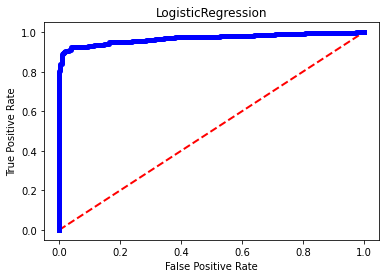

In [176]:
plt.plot([0, 1], [0, 1], 'k--', color = 'red', lw = 2)
plt.plot( fpr, tpr, color = 'b', lw = 5, label = 'ROC Curve')   # graph for AOC ROC curve
plt.xlabel('False Positive Rate')  # x axis
plt.ylabel('True Positive Rate')   # y axis
plt.title('LogisticRegression')  # Title
plt.show()

In [177]:
# As our model is giving accuracy of 94 % , therefore, curve is little bit sharp

In [179]:
auc_score = roc_auc_score(y_test, final_model.predict(x_test))
auc_score

# 0.9419696393576881

0.9419696393576881

### Deploy Model

In [180]:
import pickle
filename = 'HR_employee_attrition.pkl'                 # model name 
pickle.dump(final_model, open(filename, 'wb'))         # operation to deploy model

### Loading model

In [182]:
load_model =  pickle.load(open('HR_employee_attrition.pkl', 'rb'))    # loading deployed model
result = load_model.score(x_test, y_test)                            
print(result) 

# 0.9405405405405406

0.9405405405405406


### Conclusion

In [183]:
predicted_attrition = np.array(load_model.predict(x_test))  
original_attrition = np.array(y_test)
# convert columns in to np.array 

In [184]:
print(predicted_attrition.shape)
print(original_attrition.shape)
print(x_test.shape)
print(y_test.shape)

# (740,)
# (740,)
# (740, 51)
# (740,)

(740,)
(740,)
(740, 51)
(740,)


In [185]:
conclusion = pd.DataFrame({'Original Attrition': original_attrition, 'Predicted Attrition': predicted_attrition}, index = range(len(original_attrition)))
# Dataframe creation

In [186]:
pd.set_option('display.max_rows', None)  # To maximize the rows
conclusion

Original Attrition  Predicted Attrition
0                     0                    0
1                     0                    0
2                     0                    0
3                     0                    0
4                     0                    0
5                     0                    0
6                     0                    0
7                     0                    0
8                     1                    1
9                     1                    1
10                    1                    1
11                    0                    0
12                    0                    0
13                    1                    1
14                    1                    1
15                    0                    0
16                    1                    1
17                    0                    0
18                    0                    0
19                    0                    0
20                    0                    0
21                    0                    0
22                    1                    1
23                    0                    0
24                    1                    1
25                    1                    1
26                    0                    0
27                    1                    0
28                    0                    0
29                    1                    1
30                    0                    0
31                    1                    1
32                    0                    0
33                    0                    0
34                    1                    1
35                    1                    1
36                    0                    0
37                    1                    1
38                    1                    1
39                    1                    1
40                    0                    0
41                    1                    1
42                    1                    1
43                    1                    1
44                    1                    1
45                    0                    0
46                    0                    0
47                    1                    1
48                    1                    1
49                    1                    1
50                    0                    0
51                    1                    1
52                    0                    0
53                    0                    0
54                    1                    0
55                    0                    0
56                    1                    0
57                    1                    1
58                    1                    1
59                    0                    0
60                    1                    1
61                    1                    1
62                    0                    0
63                    0                    0
64                    0                    0
65                    0                    0
66                    1                    1
67                    0                    0
68                    1                    1
69                    0                    0
70                    0                    0
71                    1                    1
72                    0                    0
73                    0                    0
74                    1                    1
75                    0                    0
76                    0                    0
77                    0                    0
78                    1                    0
79                    1                    1
80                    1                    1
81                    1                    1
82                    0                    0
83                    1                    1
84                    1                    1
85                    1                    1
86                    0                    0
87                    1                    1
